In [869]:
import torch
import numpy as np
from networks import *
import seaborn as sns
from network_derivatives import *
import scipy
import pandas as pd

In [870]:
file_path = 'pandas_dataframes'

markers = ['o','s','^','d','*']
filepath = 'figures_paper/'

In [871]:
def load_pandas_df(file_path, file_name):
    file = file_path + '/' + file_name
    df = pd.read_pickle(file)
    
    return df
    
def filter_bound_2_3_out(df):
    
    df = df.astype({'depth': int, 'width': int, 'input_dim':int, 'output_dim':int})
    df.replace({'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{H}_O)$'}, inplace=True)
    df.replace({'sequential': 'FCNN', 'lin_residual_network': 'ResNet'}, inplace=True)

    df = df[df['type'] != 'H_o_cond_bound2']
    df = df[df['type'] != 'H_o_cond_bound3']
    return df

def filter_bound_3_out(df):
    
    df = df.astype({'width': int, 'input_dim':int, 'output_dim':int})
    df.replace({'H_o_cond_bound2': 'loose upper bound', 'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{H}_O)$'}, inplace=True)
    df.replace({'sequential': 'FCNN', 'lin_residual_network': 'ResNet'}, inplace=True)

#     df = df[df['type'] != 'H_o_cond_bound2']
    df = df[df['type'] != 'H_o_cond_bound3']
    return df

def filter_bound_1_out(df):
    
    df = df[df['type'] != 'upper bound']
    return df
        


In [239]:
num_inits = 5

dfs = []
for i in range(num_inits):
    filename = f'training_information_test_mnist_whitened_init={i}_d=49_m=[10]_L=[2]_linear_SGD_1.pkl'
    df = load_pandas_df(file_path, filename)

    df.insert(0,'init',i)
    
    dfs.append(df)
    
df = pd.concat(dfs)

In [240]:
df

init  width  depth activ_f    epoch      loss  grad_norm_squared  \
0         0   10.0    2.0  linear      0.0  0.104409       1.053460e-04   
1         0   10.0    2.0  linear      1.0  0.104304       1.039991e-04   
2         0   10.0    2.0  linear      2.0  0.104201       1.026880e-04   
3         0   10.0    2.0  linear      3.0  0.104098       1.014115e-04   
4         0   10.0    2.0  linear      4.0  0.103997       1.001684e-04   
...     ...    ...    ...     ...      ...       ...                ...   
14995     4   10.0    2.0  linear  14995.0  0.051286       1.282520e-15   
14996     4   10.0    2.0  linear  14996.0  0.051286       1.279403e-15   
14997     4   10.0    2.0  linear  14997.0  0.051286       1.276294e-15   
14998     4   10.0    2.0  linear  14998.0  0.051286       1.273192e-15   
14999     4   10.0    2.0  linear  14999.0  0.051286       1.270098e-15   

       full_grad_norm  dist_to_init  
0        1.026382e-02      0.000000  
1        1.019800e-02      0.003188  
2        1.013351e-02      0.006357  
3        1.007033e-02      0.009507  
4        1.000841e-02      0.012640  
...               ...           ...  
14995    3.581229e-08      2.659624  
14996    3.576875e-08      2.659624  
14997    3.572526e-08      2.659624  
14998    3.568182e-08      2.659624  
14999    3.563844e-08      2.659624  

[75000 rows x 9 columns]

<Axes: xlabel='epoch', ylabel='dist_to_init'>

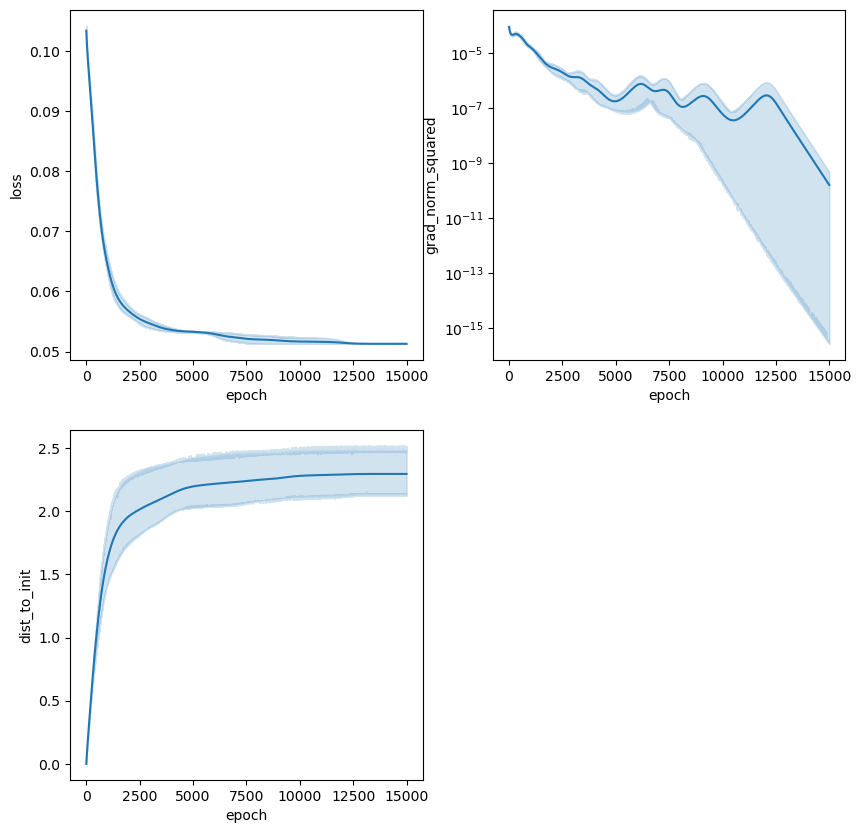

In [241]:
plt.figure
plt.subplot(221)

sns.lineplot(df, x='epoch', y='loss')

plt.subplot(222)

g = sns.lineplot(df, x='epoch', y='grad_norm_squared')
g.set(yscale='log')

plt.subplot(223)

sns.lineplot(df, x='epoch', y='dist_to_init')

In [881]:
df_relu = pd.DataFrame({})
for i in range(5):
    print(i)
    filename = f'training_information_training_fashion_whitened_init={i}_d=100_m=[30, 50]_L=[1, 2, 3]_relu_SGD_lr=1.pkl'
    df = load_pandas_df(file_path, filename)
    df_relu = pd.concat([df_relu,df])

df_relu = df_relu.astype({'acc': float})

df_relu.head(-1)

width  depth activ_f   epoch      loss  grad_norm_squared     acc  \
0       30.0    1.0    relu     0.0  0.100073           0.000012  0.0962   
1       30.0    1.0    relu     0.0  0.100063           0.000012  0.0962   
2       30.0    1.0    relu     0.0  0.100053           0.000011  0.0964   
3       30.0    1.0    relu     0.0  0.100043           0.000013  0.0964   
4       30.0    1.0    relu     0.0  0.100033           0.000012  0.0964   
...      ...    ...     ...     ...       ...                ...     ...   
19994   50.0    3.0    relu  1999.0  0.013027           0.000129  0.9556   
19995   50.0    3.0    relu  1999.0  0.013026           0.000173  0.9564   
19996   50.0    3.0    relu  1999.0  0.013027           0.000125  0.9560   
19997   50.0    3.0    relu  1999.0  0.013024           0.000131  0.9560   
19998   50.0    3.0    relu  1999.0  0.013024           0.000105  0.9562   

       full_grad_norm  dist_to_init  
0            0.003479      0.000000  
1            0.003408      0.000965  
2            0.003376      0.001818  
3            0.003545      0.002653  
4            0.003418      0.003664  
...               ...           ...  
19994        0.011354      2.957968  
19995        0.013163      2.958055  
19996        0.011179      2.958085  
19997        0.011440      2.957995  
19998        0.010262      2.957852  

[599999 rows x 9 columns]

In [882]:
df_relu_fil = df_relu[df_relu['epoch'] % 200 == 0]
df_relu_fil

width  depth activ_f   epoch      loss  grad_norm_squared     acc  \
0       30.0    1.0    relu     0.0  0.100073           0.000012  0.0962   
1       30.0    1.0    relu     0.0  0.100063           0.000012  0.0962   
2       30.0    1.0    relu     0.0  0.100053           0.000011  0.0964   
3       30.0    1.0    relu     0.0  0.100043           0.000013  0.0964   
4       30.0    1.0    relu     0.0  0.100033           0.000012  0.0964   
...      ...    ...     ...     ...       ...                ...     ...   
18005   50.0    3.0    relu  1800.0  0.014582           0.000160  0.9442   
18006   50.0    3.0    relu  1800.0  0.014582           0.000125  0.9438   
18007   50.0    3.0    relu  1800.0  0.014580           0.000123  0.9440   
18008   50.0    3.0    relu  1800.0  0.014579           0.000099  0.9438   
18009   50.0    3.0    relu  1800.0  0.014579           0.000122  0.9440   

       full_grad_norm  dist_to_init  
0            0.003479      0.000000  
1            0.003408      0.000965  
2            0.003376      0.001818  
3            0.003545      0.002653  
4            0.003418      0.003664  
...               ...           ...  
18005        0.012653      2.844336  
18006        0.011186      2.844346  
18007        0.011074      2.844233  
18008        0.009939      2.844113  
18009        0.011061      2.844314  

[3000 rows x 9 columns]

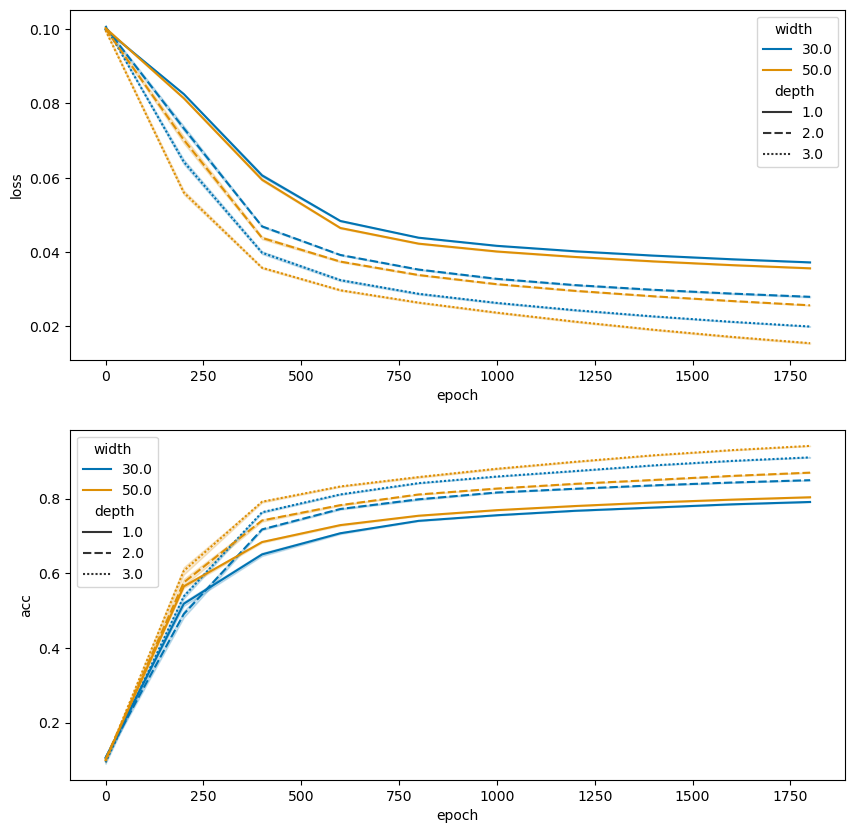

In [883]:
f = plt.figure()

plt.subplot(211)

g = sns.lineplot(df_relu_fil, x='epoch', y='loss', hue='width', style='depth', palette='colorblind')

plt.subplot(212)

g = sns.lineplot(df_relu_fil, x='epoch', y='acc', hue='width', style='depth', palette='colorblind')


In [884]:
df_linear = pd.DataFrame({})
for i in range(5):
#     print(i)
    filename = f'training_information_training_fashion_whitened_init={i}_d=100_m=[30, 50]_L=[1, 2, 3]_linear_SGD_lr=1.pkl'
    df = load_pandas_df(file_path, filename)
    df_linear = pd.concat([df_linear,df])

df_linear = df_linear.astype({'acc': float})

df_linear.head(-1)

width  depth activ_f   epoch      loss  grad_norm_squared     acc  \
0       30.0    1.0  linear     0.0  0.100127           0.000007  0.0972   
1       30.0    1.0  linear     0.0  0.100121           0.000008  0.0976   
2       30.0    1.0  linear     0.0  0.100115           0.000007  0.0980   
3       30.0    1.0  linear     0.0  0.100110           0.000008  0.0982   
4       30.0    1.0  linear     0.0  0.100104           0.000008  0.0984   
...      ...    ...     ...     ...       ...                ...     ...   
19994   50.0    3.0  linear  1999.0  0.047324           0.000051  0.7426   
19995   50.0    3.0  linear  1999.0  0.047324           0.000054  0.7424   
19996   50.0    3.0  linear  1999.0  0.047324           0.000047  0.7426   
19997   50.0    3.0  linear  1999.0  0.047324           0.000055  0.7426   
19998   50.0    3.0  linear  1999.0  0.047324           0.000045  0.7426   

       full_grad_norm  dist_to_init  
0            0.002727      0.000000  
1            0.002783      0.000666  
2            0.002694      0.001237  
3            0.002825      0.001794  
4            0.002757      0.002426  
...               ...           ...  
19994        0.007155      1.496512  
19995        0.007356      1.496093  
19996        0.006879      1.495715  
19997        0.007384      1.495711  
19998        0.006719      1.495536  

[599999 rows x 9 columns]

In [885]:
df_linear_fil = df_linear[df_linear['epoch'] % 200 == 0]
df_linear_fil

width  depth activ_f   epoch      loss  grad_norm_squared     acc  \
0       30.0    1.0  linear     0.0  0.100127           0.000007  0.0972   
1       30.0    1.0  linear     0.0  0.100121           0.000008  0.0976   
2       30.0    1.0  linear     0.0  0.100115           0.000007  0.0980   
3       30.0    1.0  linear     0.0  0.100110           0.000008  0.0982   
4       30.0    1.0  linear     0.0  0.100104           0.000008  0.0984   
...      ...    ...     ...     ...       ...                ...     ...   
18005   50.0    3.0  linear  1800.0  0.047324           0.000054  0.7424   
18006   50.0    3.0  linear  1800.0  0.047324           0.000047  0.7426   
18007   50.0    3.0  linear  1800.0  0.047324           0.000055  0.7426   
18008   50.0    3.0  linear  1800.0  0.047324           0.000045  0.7426   
18009   50.0    3.0  linear  1800.0  0.047324           0.000042  0.7428   

       full_grad_norm  dist_to_init  
0            0.002727      0.000000  
1            0.002783      0.000666  
2            0.002694      0.001237  
3            0.002825      0.001794  
4            0.002757      0.002426  
...               ...           ...  
18005        0.007361      1.496343  
18006        0.006884      1.495964  
18007        0.007389      1.495961  
18008        0.006724      1.495786  
18009        0.006443      1.496239  

[3000 rows x 9 columns]

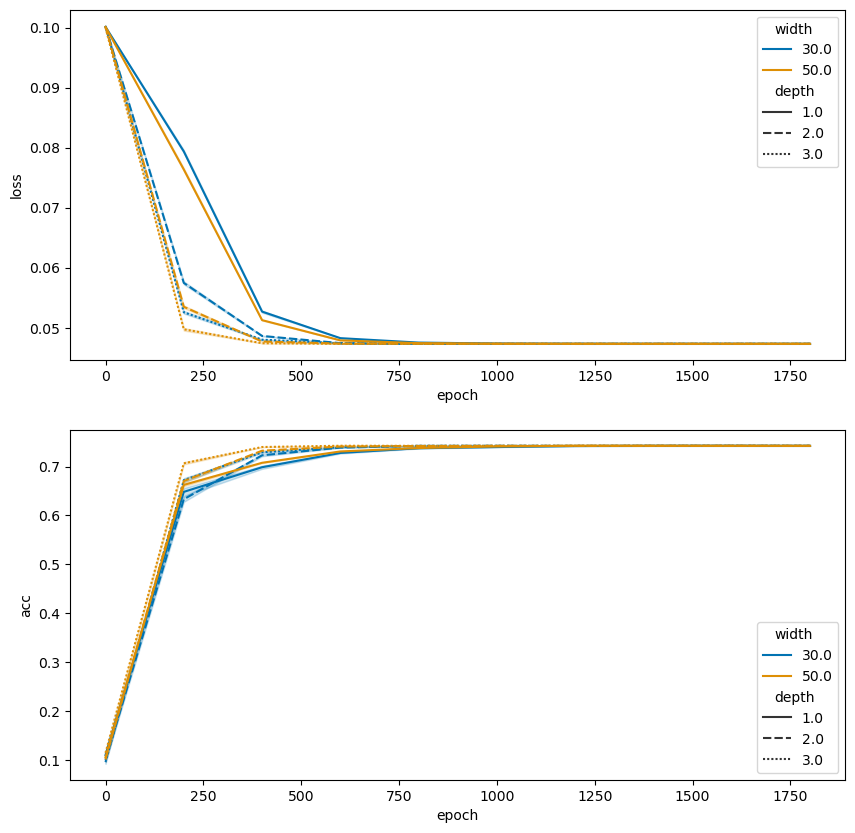

In [886]:
f = plt.figure()

plt.subplot(211)

g = sns.lineplot(df_linear_fil, x='epoch', y='loss', hue='width', style='depth', palette='colorblind')

plt.subplot(212)

g = sns.lineplot(df_linear_fil, x='epoch', y='acc', hue='width', style='depth', palette='colorblind')


In [923]:
filename = 'full_hessian_information_trained_experiments_test_.pkl'

df_hess = load_pandas_df(file_path, filename)

df_hess.iloc[0].H_spectrum

In [924]:
df_hess

input_dim  output_dim  width  depth activ_f   epoch         H_cond  \
0       49.0        10.0   30.0    3.0    relu     0.0  846583.645947   
1       49.0        10.0   30.0    3.0    relu  3500.0  990542.617047   
2       49.0        10.0   30.0    3.0    relu  3500.0  990542.617047   

        H_o_cond  lam_abs_min_H  lam_abs_max_H  lam_abs_min_H_o  \
0   98802.479413   7.608472e-07       0.644121         0.000005   
1  424738.450761   2.526375e-06       2.502482         0.000006   
2  424738.450761   2.526375e-06       2.502482         0.000006   

   lam_abs_max_H_o  mean_diff_H_H_o  max_diff_H_H_o  std_diff_H_H_o  H_rank  \
0         0.481344     1.062169e-07        0.022391        0.000379  3243.0   
1         2.502499     1.350527e-09        0.000229        0.000005  3101.0   
2         2.502499     1.350527e-09        0.000229        0.000005  3101.0   

   H_o_rank                                         H_spectrum  \
0    1000.0  [2.4807352142534023e-35, 4.5583946281725644e-3...   
1    1000.0  [7.586216374248866e-35, 7.051615722158983e-34,...   
2    1000.0  [7.586216374248866e-35, 7.051615722158983e-34,...   

                                        H_o_spectrum  
0  [6.335737765683053e-37, 7.2561095540156335e-37...  
1  [1.4910350686307484e-35, 8.20395955008967e-35,...  
2  [1.4910350686307484e-35, 8.20395955008967e-35,...

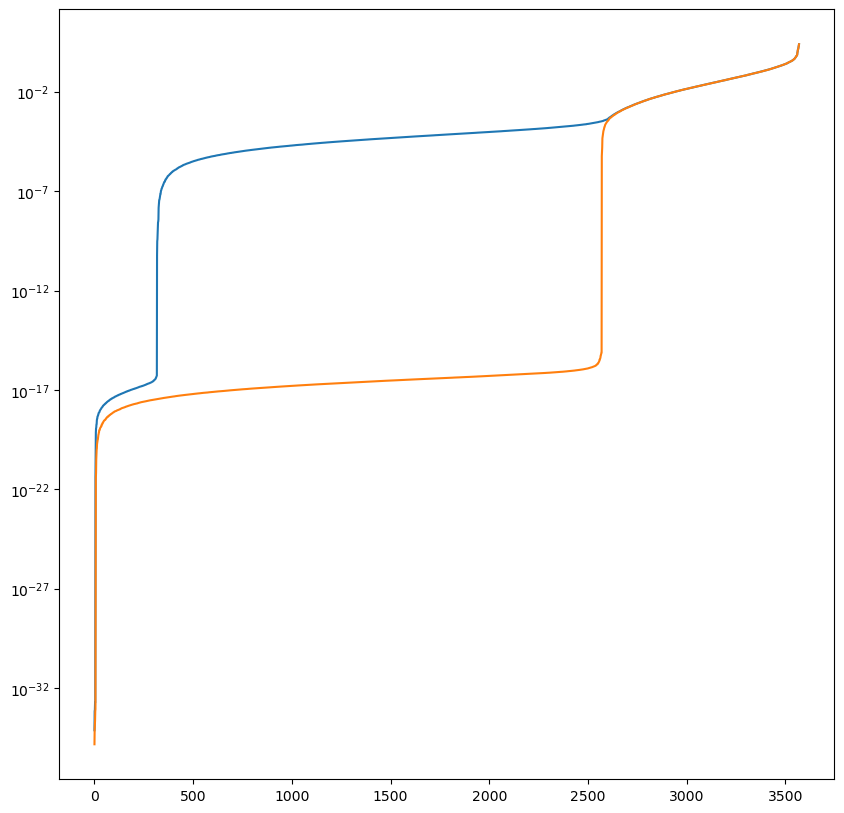

In [925]:
plt.semilogy(df_hess.iloc[-1].H_spectrum)
plt.semilogy(df_hess.iloc[-1].H_o_spectrum)

In [930]:
fn = 'training_information_training_mnist_whitened_init=0_d=49_m=[30]_L=[3]_relu_SGD_lr=2.pkl'

df = load_pandas_df(file_path, fn)

df

width  depth activ_f   epoch      loss  grad_norm_squared  \
0      30.0    3.0    relu     0.0  0.114768       2.973960e-03   
1      30.0    3.0    relu     1.0  0.109432       1.945453e-03   
2      30.0    3.0    relu     2.0  0.105839       1.426881e-03   
3      30.0    3.0    relu     3.0  0.103185       1.095741e-03   
4      30.0    3.0    relu     4.0  0.101123       8.716839e-04   
...     ...    ...     ...     ...       ...                ...   
9995   30.0    3.0    relu  9995.0  0.000008       2.037122e-09   
9996   30.0    3.0    relu  9996.0  0.000008       2.697710e-09   
9997   30.0    3.0    relu  9997.0  0.000008       1.492497e-09   
9998   30.0    3.0    relu  9998.0  0.000008       1.504646e-09   
9999   30.0    3.0    relu  9999.0  0.000008       2.441227e-09   

                 acc  full_grad_norm  dist_to_init  
0     tensor(0.1100)        0.054534      0.000000  
1     tensor(0.1100)        0.044107      0.027287  
2     tensor(0.1500)        0.037774      0.051596  
3     tensor(0.1400)        0.033102      0.073819  
4     tensor(0.1400)        0.029524      0.094258  
...              ...             ...           ...  
9995      tensor(1.)        0.000045      1.951826  
9996      tensor(1.)        0.000052      1.951830  
9997      tensor(1.)        0.000039      1.951833  
9998      tensor(1.)        0.000039      1.951836  
9999      tensor(1.)        0.000049      1.951840  

[10000 rows x 9 columns]

In [931]:
filename = 'full_hessian_information_trained_experiments_mnistNOTWhitened.pkl'

df_hess = load_pandas_df(file_path, filename)

df_hess

input_dim  output_dim  width  depth activ_f   epoch         H_cond  \
0        100.0        10.0   30.0    1.0    relu     0.0  979817.855841   
1        100.0        10.0   30.0    1.0    relu  1999.0  992357.954066   
2        100.0        10.0   30.0    1.0    relu     0.0  934848.426912   
3        100.0        10.0   30.0    1.0    relu  1999.0  991618.940946   
4        100.0        10.0   30.0    1.0    relu     0.0  981377.446676   
..         ...         ...    ...    ...     ...     ...            ...   
115      100.0        10.0   50.0    3.0  linear  1999.0  994515.653699   
116      100.0        10.0   50.0    3.0  linear     0.0  986918.981789   
117      100.0        10.0   50.0    3.0  linear  1999.0  965002.584760   
118      100.0        10.0   50.0    3.0  linear     0.0  954980.480050   
119      100.0        10.0   50.0    3.0  linear  1999.0  945927.905868   

         H_o_cond  lam_abs_min_H  lam_abs_max_H  lam_abs_min_H_o  \
0    6.985860e+10       0.000002       1.766597     1.215751e-10   
1    6.922394e+10       0.000002       1.753070     1.219058e-10   
2    3.248700e+10       0.000003       2.410923     3.372757e-10   
3    3.208674e+10       0.000002       2.360773     3.368500e-10   
4    3.169528e+10       0.000002       1.831944     2.804013e-10   
..            ...            ...            ...              ...   
115  6.404485e+08       0.000003       3.254944     2.374339e-08   
116  6.612952e+08       0.000006       5.626677     3.785580e-08   
117  6.503477e+08       0.000006       5.412840     3.764012e-08   
118  4.093958e+08       0.000004       4.073625     4.771170e-08   
119  4.074008e+08       0.000004       4.021148     4.754990e-08   

     lam_abs_max_H_o  mean_diff_H_H_o  max_diff_H_H_o  std_diff_H_H_o  H_rank  \
0           8.493070     1.174206e-06        0.154163        0.003871  2306.0   
1           8.438797     1.165599e-06        0.152620        0.003843  2305.0   
2          10.957077     1.551992e-06        0.179977        0.005120  2246.0   
3          10.808419     1.533659e-06        0.180079        0.005060  2248.0   
4           8.887396     1.240607e-06        0.137049        0.004093  2273.0   
..               ...              ...             ...             ...     ...   
115        15.206415     2.165487e-07        0.112210        0.002274  3413.0   
116        25.033857     3.389523e-07        0.261160        0.003559  3409.0   
117        24.479168     3.316094e-07        0.252539        0.003482  3409.0   
118        19.532968     2.981838e-07        0.239398        0.003131  3418.0   
119        19.371869     2.957970e-07        0.233412        0.003106  3418.0   

     H_o_rank                                         H_spectrum  \
0      2376.0  [0.0, 0.0, 0.0, 0.0, 1.8749807698081687e-104, ...   
1      2376.0  [0.0, 0.0, 0.0, 0.0, 2.232397248598194e-103, 1...   
2      2347.0  [0.0, 0.0, 2.561594966041574e-103, 1.368296465...   
3      2346.0  [0.0, 0.0, 8.938734270334838e-103, 4.101556868...   
4      2366.0  [0.0, 0.0, 7.068325606876783e-87, 2.4410298351...   
..        ...                                                ...   
115     750.0  [8.482950377354587e-36, 5.831234830561255e-34,...   
116     750.0  [5.302458226649383e-34, 5.6691425927082055e-34...   
117     750.0  [2.312825562190063e-34, 4.520343956445927e-34,...   
118     750.0  [2.395660489106273e-34, 2.987004356864667e-34,...   
119     750.0  [7.375967615842391e-35, 2.05094322245558e-34, ...   

                                          H_o_spectrum  
0    [0.0, 0.0, 0.0, 0.0, 3.444914327619169e-102, 2...  
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3681331889132...  
2    [0.0, 0.0, 1.5212467130007047e-101, 8.19761180...  
3    [0.0, 0.0, 5.129515887686409e-102, 3.520066219...  
4    [0.0, 0.0, 9.638276053295821e-84, 1.2415219298...  
..                                                 ...  
115  [5.399871183549333e-35, 1.0196586518801804e-33...  
116  [2.2145574434053236e-34, 4.480460810

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/users/staff/dmi-dmi/zhao0005/anaconda3/lib/p

<Figure size 1000x1000 with 0 Axes>

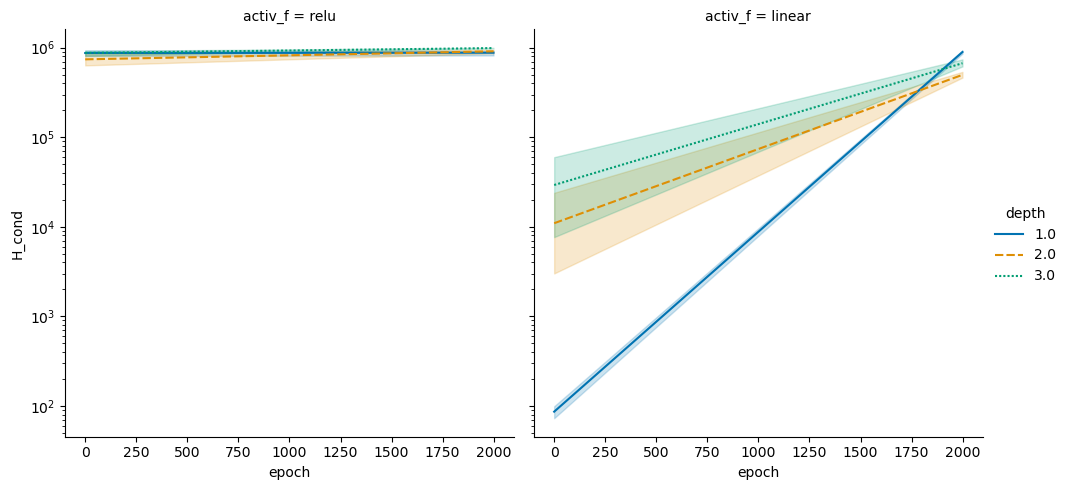

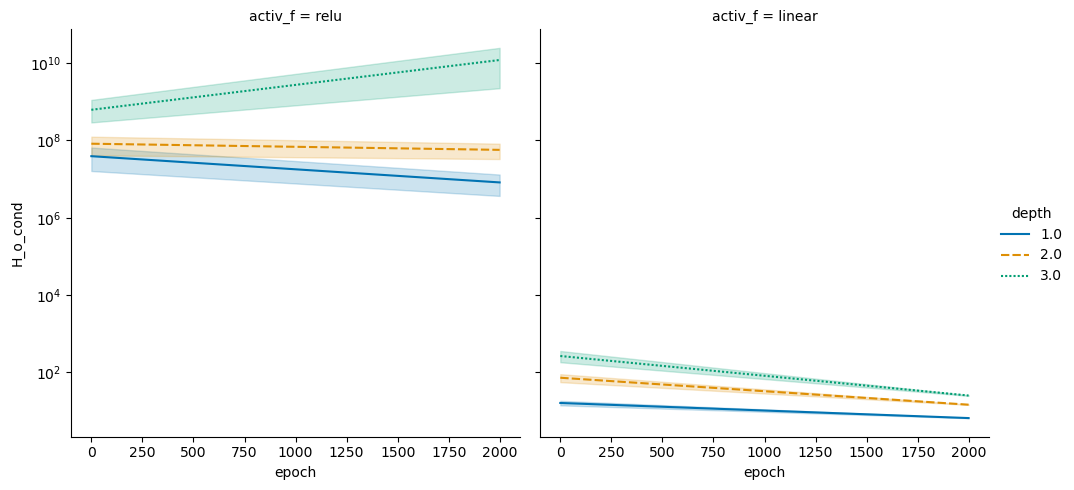

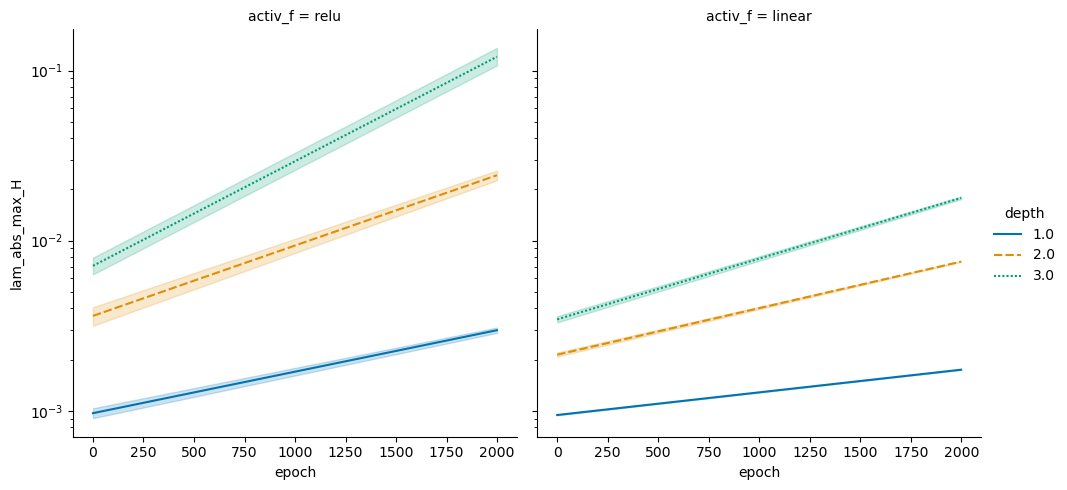

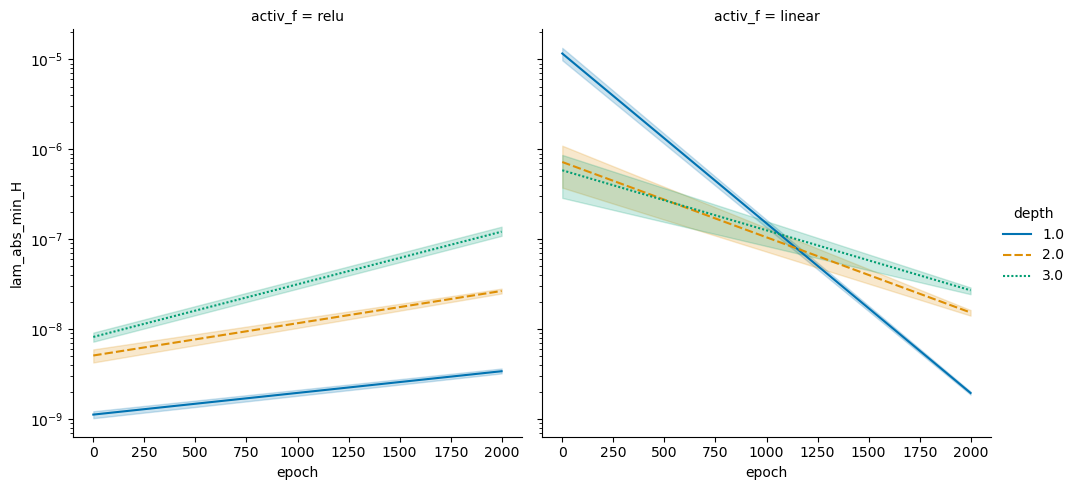

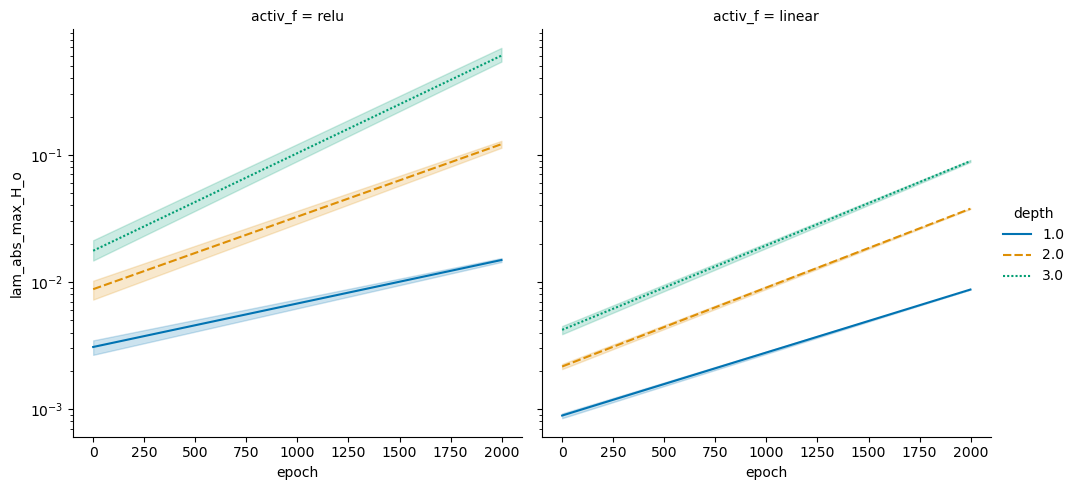

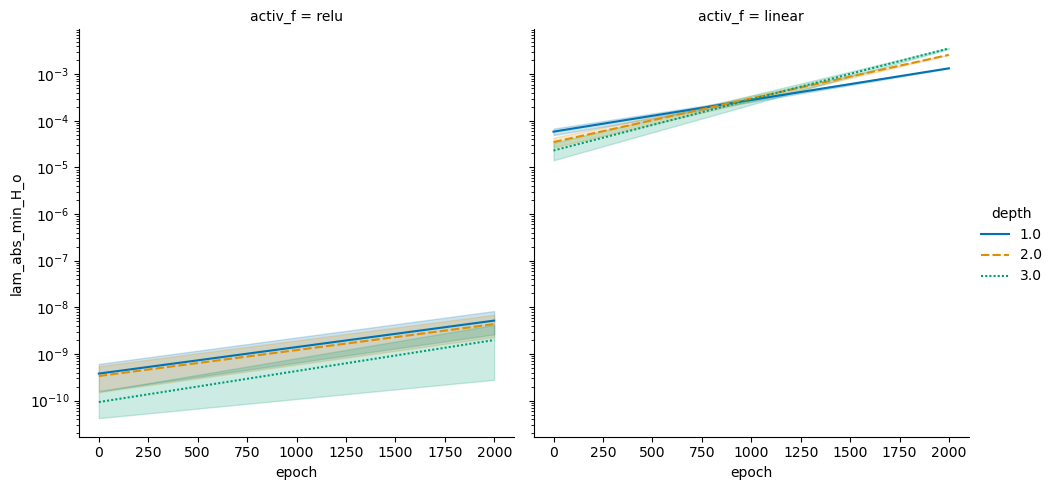

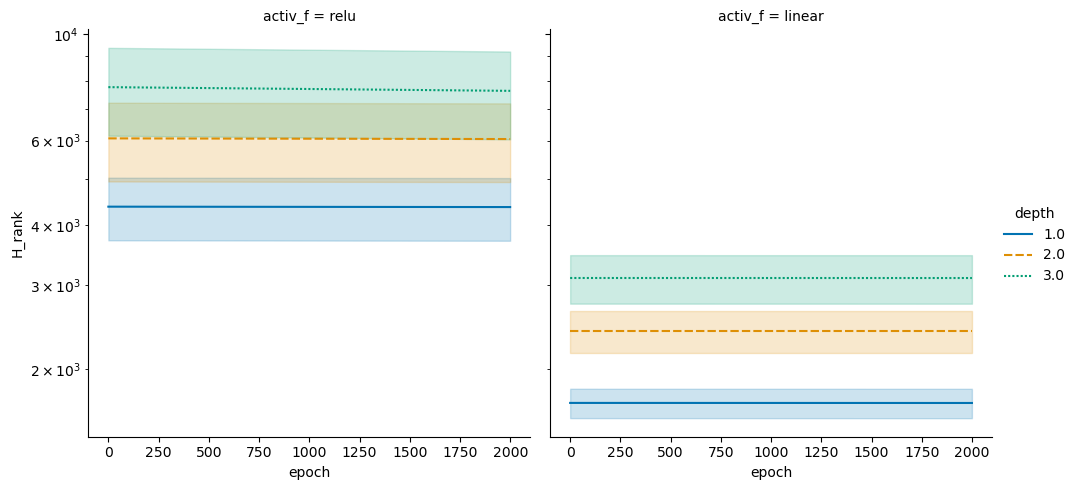

In [874]:
f = plt.figure()

# plt.subplot(211)

g = sns.relplot(df_hess, x='epoch', y='H_cond', col='activ_f', hue='depth', style='depth', palette='colorblind', kind='line')
g.set(yscale='log')

h = sns.relplot(df_hess, x='epoch', y='H_o_cond', col='activ_f', hue='depth', style='depth', palette='colorblind', kind='line')
h.set(yscale='log')

i = sns.relplot(df_hess, x='epoch', y='lam_abs_max_H', col='activ_f', hue='depth', style='depth', palette='colorblind', kind='line')
i.set(yscale='log')

j = sns.relplot(df_hess, x='epoch', y='lam_abs_min_H', col='activ_f', hue='depth', style='depth', palette='colorblind', kind='line')
j.set(yscale='log')

k = sns.relplot(df_hess, x='epoch', y='lam_abs_max_H_o', col='activ_f', hue='depth', style='depth', palette='colorblind', kind='line')
k.set(yscale='log')

l = sns.relplot(df_hess, x='epoch', y='lam_abs_min_H_o', col='activ_f', hue='depth', style='depth', palette='colorblind', kind='line')
l.set(yscale='log')

m = sns.relplot(df_hess, x='epoch', y='H_rank', col='activ_f', hue='depth', style='depth', palette='colorblind', kind='line')
m.set(yscale='log')
# plt.subplot(212)

# # g = sns.relplot(df_hess, x='epoch', y='H_rank', col='width', style='depth', palette='colorblind')
# g = sns.relplot(df_hess, x='epoch', y='H_o_rank', col='width', hue='depth', palette='colorblind')


In [875]:
# df_hess.tail(12)

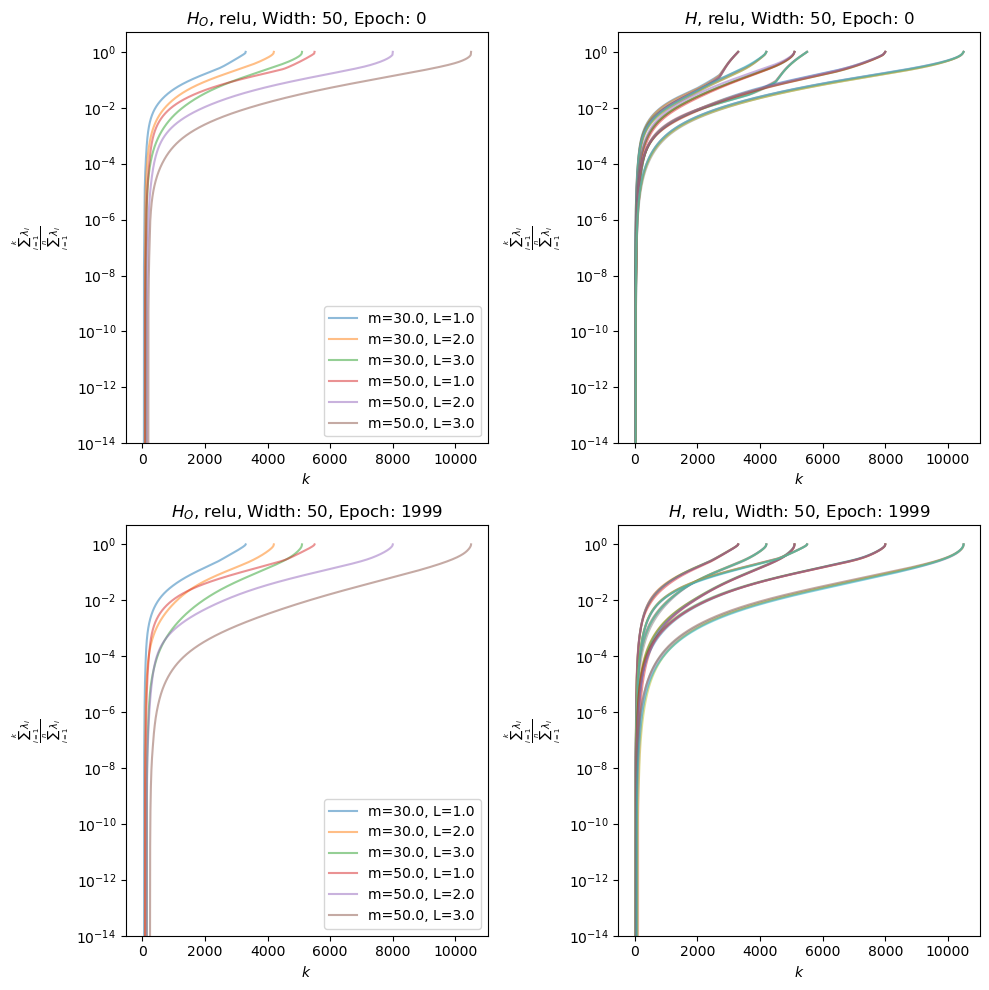

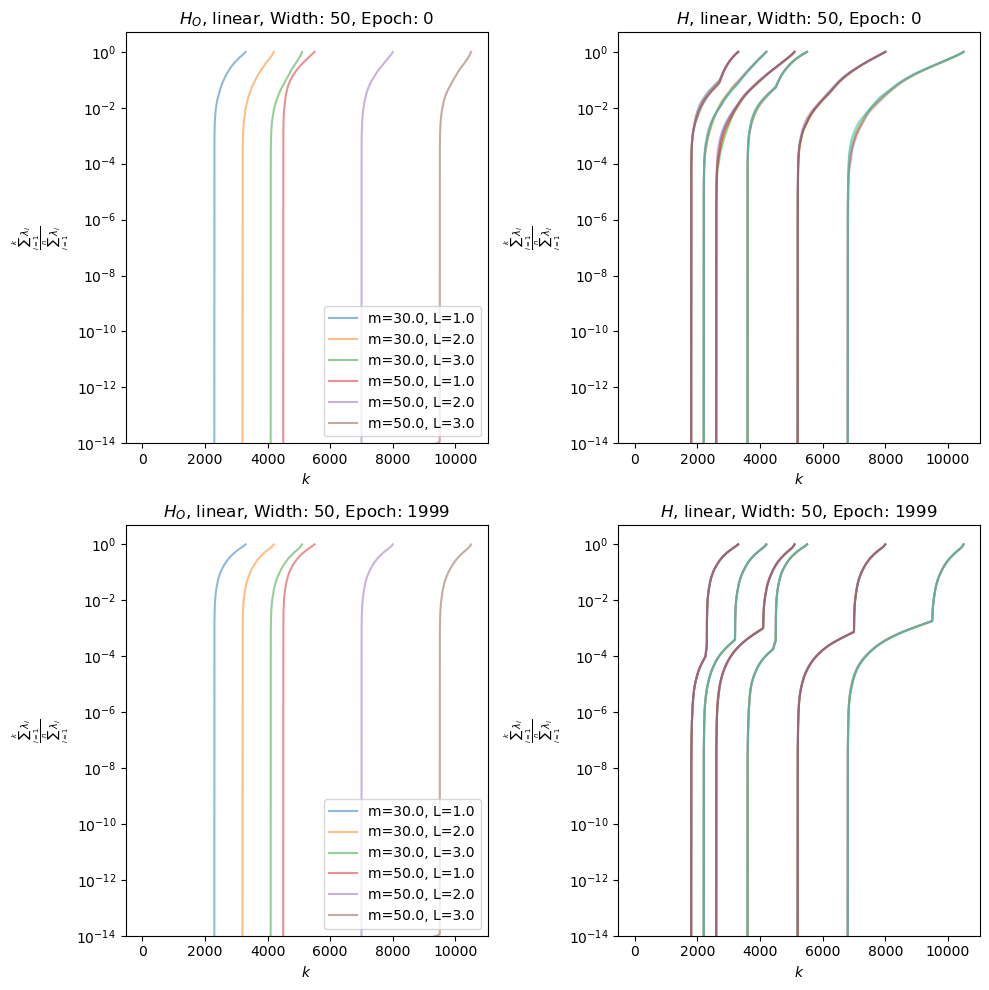

In [876]:
epochs = df_hess.epoch.unique()
widths = df_hess.width.unique()
depths = df_hess.depth.unique()
activ_fs = df_hess.activ_f.unique()


for _, activ_f in enumerate(activ_fs):
    f = plt.figure()
    for _, width in enumerate(widths):
        
        for _, depth in enumerate(depths):

            
            plt.subplot(len(epochs),2,1)

            df_hess_fil = df_hess[df_hess['activ_f'] == activ_f]
            df_hess_fil = df_hess_fil[df_hess_fil['depth'] == depth]
            df_hess_fil = df_hess_fil[df_hess_fil['width'] == width]

            for ind, epoch in enumerate(epochs):

                H_specs_epoch = df_hess_fil[df_hess_fil['epoch']==epoch].get(['epoch', 'H_spectrum', 'H_o_spectrum'])

#                 print(len((H_specs_epoch)))
                plt.subplot(len(epochs),2, 2*int(ind)+1)

    #             print(width, depth)
                
                

                for i in range(len(H_specs_epoch)-1, len(H_specs_epoch)):
                    plt.semilogy(np.cumsum(H_specs_epoch.iloc[i]['H_o_spectrum'])/np.cumsum(H_specs_epoch.iloc[i]['H_o_spectrum'])[-1],alpha=0.5, label=f'm={width}, L={depth}')
#                     plt.hist(np.log10(H_specs_epoch.iloc[i]['H_o_spectrum']),alpha=0.5, bins=20)

                plt.ylim([10e-15,5])
                plt.title(f'$H_O$, {activ_f}, Width: {int(width)}, Epoch: {int(epoch)}')
                plt.xlabel(r'$k$')
                plt.ylabel(r'$\frac{\sum_{i=1}^k {\lambda_i}}{\sum_{i=1}^n {\lambda_i}}$')
                plt.legend()

            #         plt.semilogy(H_specs_epoch.iloc[i]['H_o_spectrum'],alpha=0.5)

                plt.subplot(len(epochs),2, 2*int(ind)+2)
                

                for i in range(len(H_specs_epoch)):
                    plt.semilogy(np.cumsum(H_specs_epoch.iloc[i]['H_spectrum'])/np.cumsum(H_specs_epoch.iloc[i]['H_spectrum'])[-1],alpha=0.5, label=f'm={width}, L={depth}')
#                     plt.hist(np.log10(H_specs_epoch.iloc[i]['H_spectrum']),alpha=0.5, bins=20)
#                     plt.semilogy(H_specs_epoch.iloc[i]['H_spectrum'],alpha=0.5)
            #         plt.xscale('log')
                plt.ylim([10e-15,5])

                plt.title(f'$H$, {activ_f}, Width: {int(width)}, Epoch: {int(epoch)}')
                plt.xlabel(r'$k$')
                plt.ylabel(r'$\frac{\sum_{i=1}^k {\lambda_i}}{\sum_{i=1}^n {\lambda_i}}$')
            
#                 plt.legend()

    f.tight_layout()

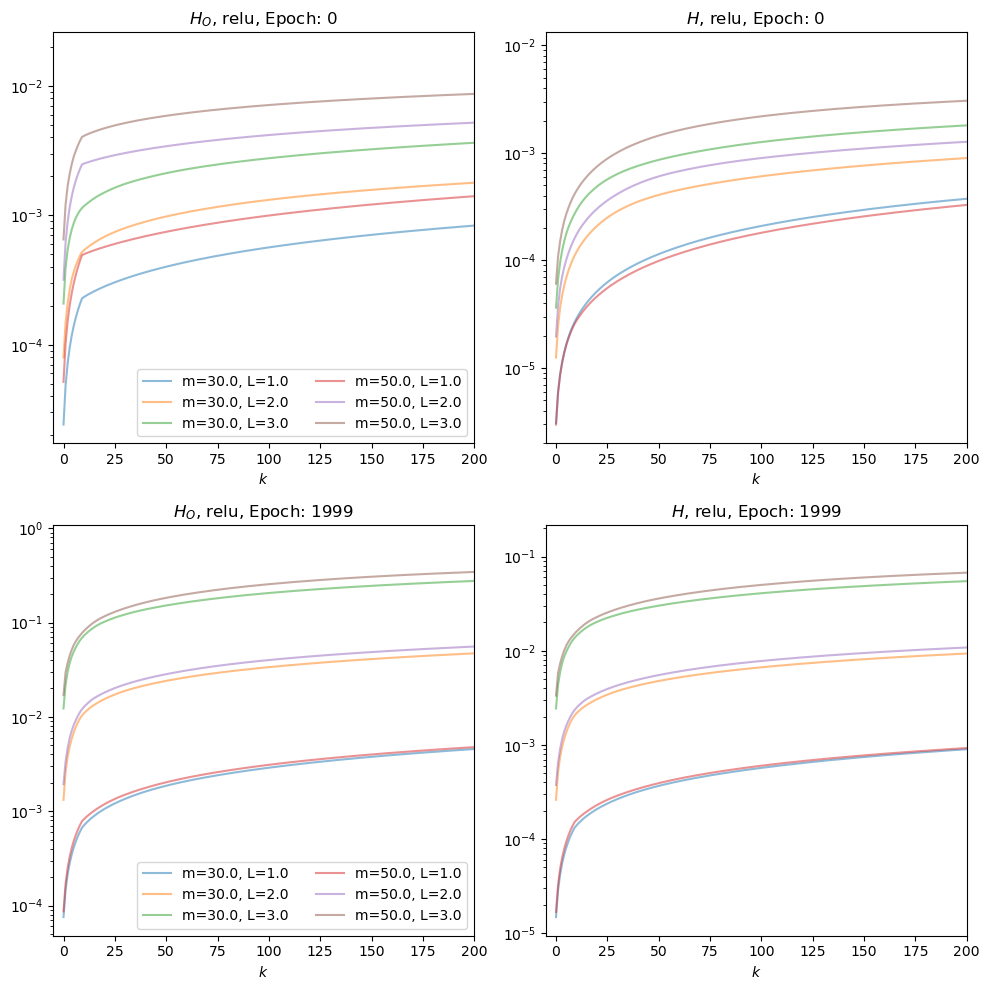

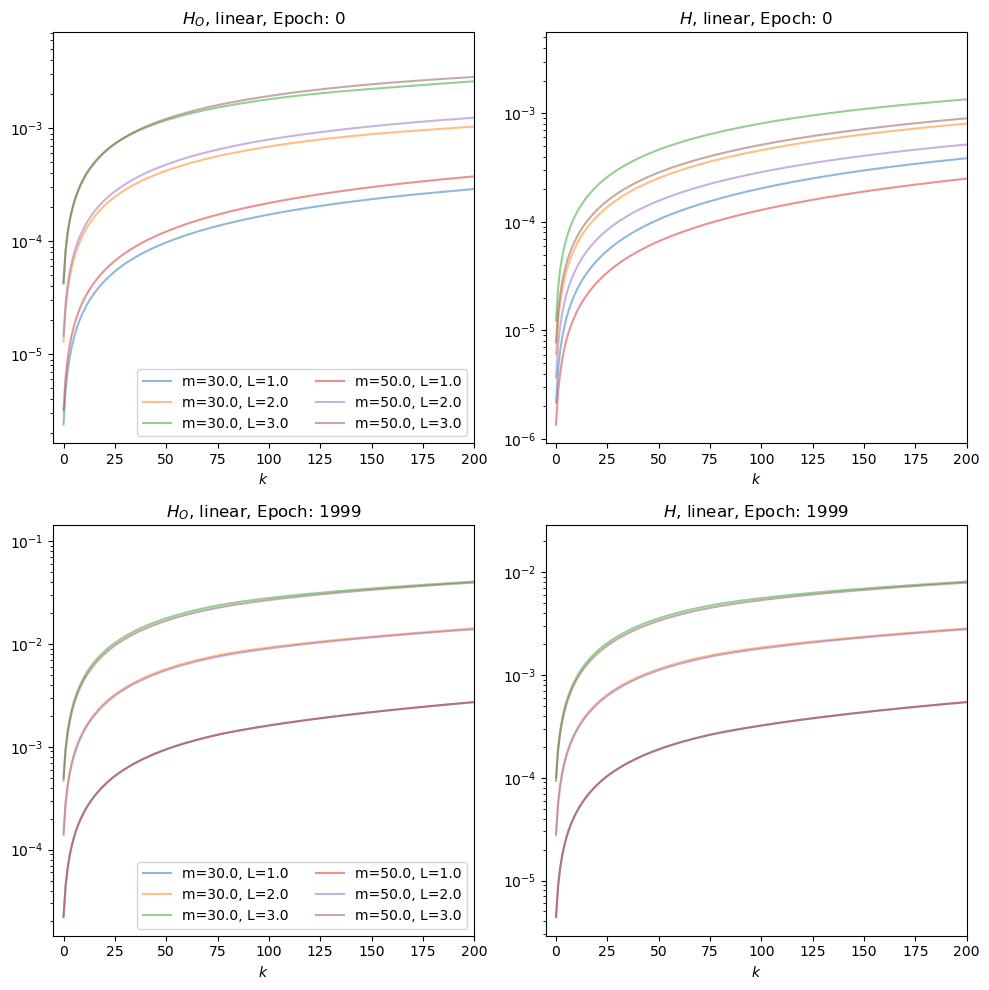

In [894]:
epochs = df_hess.epoch.unique()
widths = df_hess.width.unique()
depths = df_hess.depth.unique()
activ_fs = df_hess.activ_f.unique()


for _, activ_f in enumerate(activ_fs):
    f = plt.figure()
    for _, width in enumerate(widths):
        
        for _, depth in enumerate(depths):

            
            plt.subplot(len(epochs),2,1)

            df_hess_fil = df_hess[df_hess['activ_f'] == activ_f]
            df_hess_fil = df_hess_fil[df_hess_fil['depth'] == depth]
            df_hess_fil = df_hess_fil[df_hess_fil['width'] == width]

            for ind, epoch in enumerate(epochs):

                H_specs_epoch = df_hess_fil[df_hess_fil['epoch']==epoch].get(['epoch', 'H_spectrum', 'H_o_spectrum'])

#                 print(len((H_specs_epoch)))
                plt.subplot(len(epochs),2, 2*int(ind)+1)

    #             print(width, depth)
                
                

                for i in range(len(H_specs_epoch)-1, len(H_specs_epoch)):
                    plt.semilogy(H_specs_epoch.iloc[i]['H_o_spectrum'][-1]*np.cumsum(np.flip(H_specs_epoch.iloc[i]['H_o_spectrum']))/(sum(H_specs_epoch.iloc[i]['H_o_spectrum'])),alpha=0.5, label=f'm={width}, L={depth}')
#                     plt.hist(np.log10(H_specs_epoch.iloc[i]['H_o_spectrum']),alpha=0.5, bins=20)
                    
#                     print(f"epoch={epoch}, width={width}, depth={depth}, max_eval_Ho={H_specs_epoch.iloc[i]['H_o_spectrum'][-1]}")
#                 plt.ylim([1e-2,1])
                plt.title(f'$H_O$, {activ_f}, Epoch: {int(epoch)}')
                plt.xlabel(r'$k$')
#                 plt.ylabel(r'$\frac{\sum_{i=1}^k {\lambda_i}}{\sum_{i=1}^n {\lambda_i}}$')
                plt.legend(ncol=2)
                plt.xlim([-5,200])

            #         plt.semilogy(H_specs_epoch.iloc[i]['H_o_spectrum'],alpha=0.5)

                plt.subplot(len(epochs),2, 2*int(ind)+2)
                

                for i in range(len(H_specs_epoch)-1, len(H_specs_epoch)):
                    plt.semilogy(H_specs_epoch.iloc[i]['H_spectrum'][-1]*np.cumsum(np.flip(H_specs_epoch.iloc[i]['H_spectrum']))/sum(H_specs_epoch.iloc[i]['H_spectrum']),alpha=0.5, label=f'm={width}, L={depth}')
                    
#                     print(f"epoch={epoch}, width={width}, depth={depth}, max_eval_H={H_specs_epoch.iloc[i]['H_spectrum'][-1]}")
#                     plt.hist(np.log10(H_specs_epoch.iloc[i]['H_spectrum']),alpha=0.5, bins=20)
#                     plt.semilogy(H_specs_epoch.iloc[i]['H_spectrum'],alpha=0.5)
            #         plt.xscale('log')
#                 plt.ylim([1e-2,1])

                plt.title(f'$H$, {activ_f}, Epoch: {int(epoch)}')
                plt.xlabel(r'$k$')
                plt.xlim([-5,200])
#                 plt.ylabel(r'$\frac{\sum_{i=1}^k {\lambda_i}}{\sum_{i=1}^n {\lambda_i}}$')
            
#                 plt.legend()

    f.tight_layout()

In [878]:
len(widths),len(depths),(i)*len(widths)+(j+1)

TypeError: unsupported operand type(s) for +: 'FacetGrid' and 'int'

In [ ]:
(i)*len(widths)+(j+1)

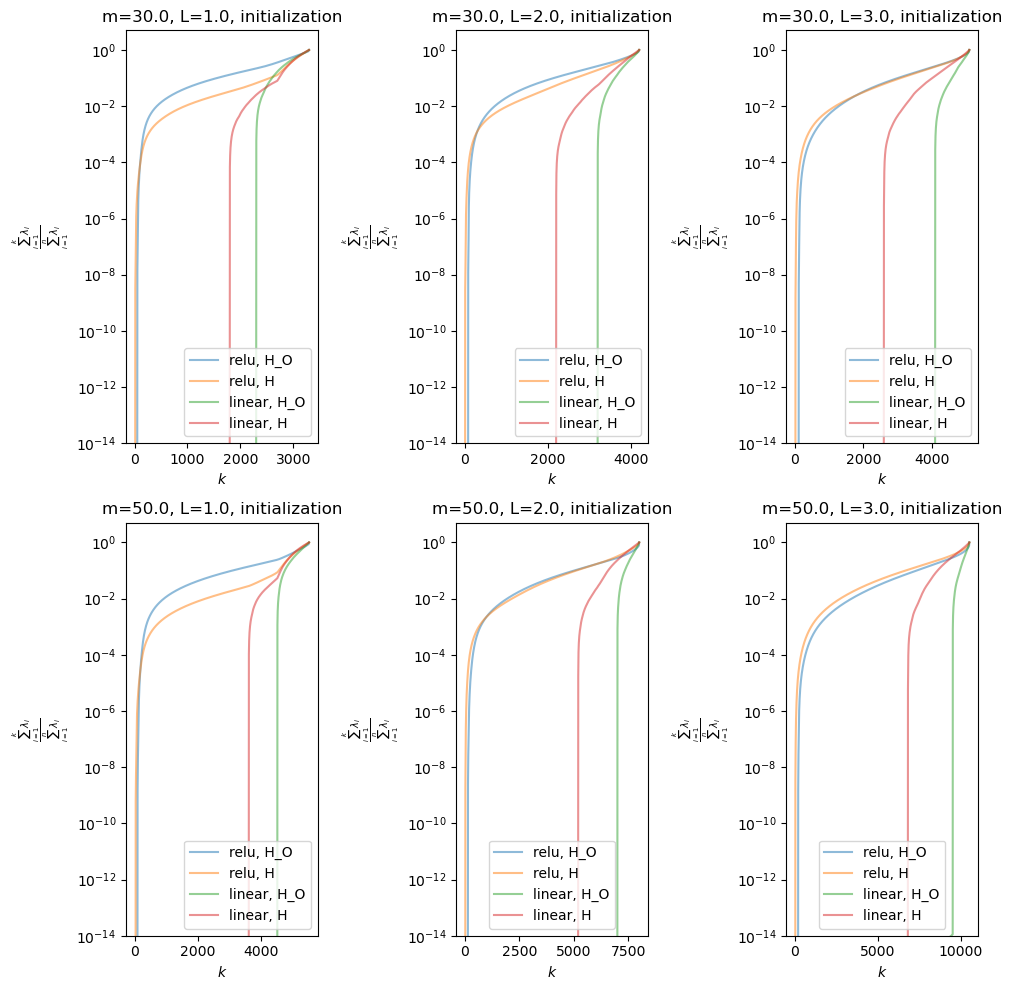

In [879]:
epochs = df_hess.epoch.unique()
widths = df_hess.width.unique()
depths = df_hess.depth.unique()
activ_fs = df_hess.activ_f.unique()

epoch = 0


f = plt.figure(figsize=(10,10))
for i, width in enumerate(widths):
    for j, depth in enumerate(depths):
        
        plt.subplot(len(widths),len(depths),(i)*(len(widths)+1)+(j+1))

        df_hess_fil = df_hess[df_hess['depth'] == depth]
        df_hess_fil = df_hess_fil[df_hess_fil['width'] == width]
        df_hess_fil = df_hess_fil[df_hess_fil['epoch'] == epoch]
            
        for _, activ_f in enumerate(activ_fs):

            H_specs_epoch = df_hess_fil[df_hess_fil['activ_f']==activ_f].get(['epoch', 'H_spectrum', 'H_o_spectrum'])

            for k in range(len(H_specs_epoch)-1, len(H_specs_epoch)):
                plt.semilogy(np.cumsum(H_specs_epoch.iloc[k]['H_o_spectrum'])/np.cumsum(H_specs_epoch.iloc[k]['H_o_spectrum'])[-1],alpha=0.5, label=f'{activ_f}, H_O')
                plt.semilogy(np.cumsum(H_specs_epoch.iloc[k]['H_spectrum'])/np.cumsum(H_specs_epoch.iloc[k]['H_spectrum'])[-1],alpha=0.5, label=f'{activ_f}, H')
#                     plt.hist(np.log10(H_specs_epoch.iloc[i]['H_o_spectrum']),alpha=0.5, bins=20)

                plt.ylim([10e-15,5])
                plt.title(f'm={width}, L={depth}, initialization')
                plt.xlabel(r'$k$')
                plt.ylabel(r'$\frac{\sum_{i=1}^k {\lambda_i}}{\sum_{i=1}^n {\lambda_i}}$')
                plt.legend()

f.tight_layout()

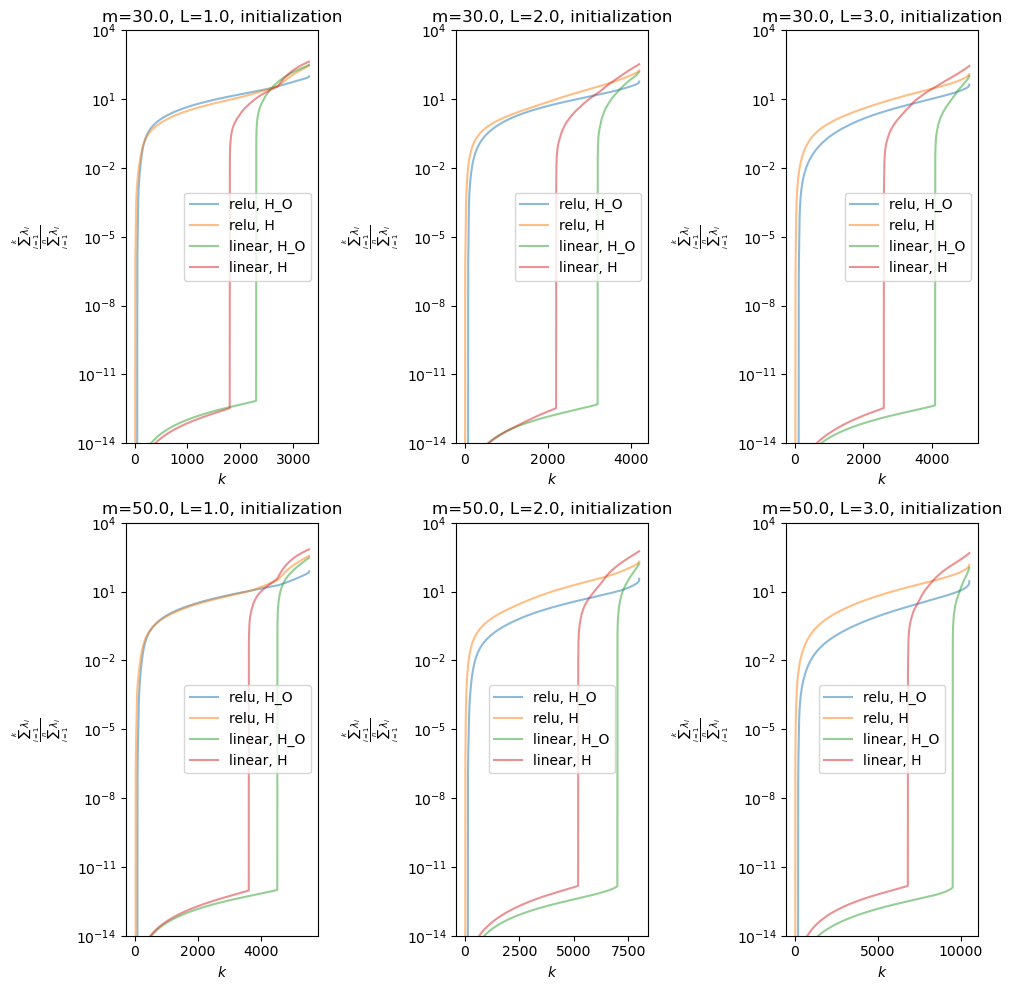

In [880]:
epochs = df_hess.epoch.unique()
widths = df_hess.width.unique()
depths = df_hess.depth.unique()
activ_fs = df_hess.activ_f.unique()

epoch = 0


f = plt.figure(figsize=(10,10))
for i, width in enumerate(widths):
    for j, depth in enumerate(depths):
        
        plt.subplot(len(widths),len(depths),(i)*(len(widths)+1)+(j+1))

        df_hess_fil = df_hess[df_hess['depth'] == depth]
        df_hess_fil = df_hess_fil[df_hess_fil['width'] == width]
        df_hess_fil = df_hess_fil[df_hess_fil['epoch'] == epoch]
            
        for _, activ_f in enumerate(activ_fs):

            H_specs_epoch = df_hess_fil[df_hess_fil['activ_f']==activ_f].get(['epoch', 'H_spectrum', 'H_o_spectrum'])

            for k in range(len(H_specs_epoch)-1, len(H_specs_epoch)):
                plt.semilogy(np.cumsum(H_specs_epoch.iloc[k]['H_o_spectrum'])/(H_specs_epoch.iloc[k]['H_o_spectrum'])[-1],alpha=0.5, label=f'{activ_f}, H_O')
                plt.semilogy(np.cumsum(H_specs_epoch.iloc[k]['H_spectrum'])/(H_specs_epoch.iloc[k]['H_spectrum'])[-1],alpha=0.5, label=f'{activ_f}, H')
#                     plt.hist(np.log10(H_specs_epoch.iloc[i]['H_o_spectrum']),alpha=0.5, bins=20)

                plt.ylim([10e-15,10e3])
                plt.title(f'm={width}, L={depth}, initialization')
                plt.xlabel(r'$k$')
                plt.ylabel(r'$\frac{\sum_{i=1}^k {\lambda_i}}{\sum_{i=1}^n {\lambda_i}}$')
                plt.legend()

f.tight_layout()

In [728]:

df_hess = df_hess.columns

input_dim  output_dim  width  depth activ_f   epoch         H_cond  \
0        100.0        10.0   30.0    1.0    relu     0.0  895696.685578   
1        100.0        10.0   30.0    1.0    relu  1999.0  668392.758501   
2        100.0        10.0   30.0    1.0    relu     0.0  785669.845595   
3        100.0        10.0   30.0    1.0    relu  1999.0  386815.797242   
4        100.0        10.0   30.0    1.0    relu     0.0  988320.107934   
..         ...         ...    ...    ...     ...     ...            ...   
115      100.0        10.0   50.0    3.0  linear  1999.0  815519.215371   
116      100.0        10.0   50.0    3.0  linear     0.0    5514.521620   
117      100.0        10.0   50.0    3.0  linear  1999.0  565822.463335   
118      100.0        10.0   50.0    3.0  linear     0.0   23183.664058   
119      100.0        10.0   50.0    3.0  linear  1999.0  748574.404996   

         H_o_cond  lam_abs_min_H  lam_abs_max_H  lam_abs_min_H_o  \
0    2.849826e+06   1.007104e-09       0.000902     8.853162e-10   
1    2.691270e+06   3.989931e-09       0.002667     4.948502e-09   
2    2.943482e+07   1.133501e-09       0.000891     8.640136e-11   
3    2.211956e+07   6.688864e-09       0.002587     5.843638e-10   
4    3.947367e+06   8.876372e-10       0.000877     6.163212e-10   
..            ...            ...            ...              ...   
115  1.785820e+01   2.092838e-08       0.017067     4.777673e-03   
116  1.226937e+02   6.665266e-07       0.003676     3.937943e-05   
117  1.701774e+01   3.032114e-08       0.017156     5.039802e-03   
118  7.893424e+01   1.574931e-07       0.003651     6.133483e-05   
119  1.708671e+01   2.363280e-08       0.017691     5.175914e-03   

     lam_abs_max_H_o  mean_diff_H_H_o  max_diff_H_H_o  std_diff_H_H_o  H_rank  \
0           0.002523     1.179979e-09        0.000141        0.000004  2973.0   
1           0.013318     6.447682e-09        0.001160        0.000021  2833.0   
2           0.002543     1.171278e-09        0.000124        0.000004  2944.0   
3           0.012926     6.560546e-09        0.001623        0.000022  2832.0   
4           0.002433     1.133247e-09        0.000142        0.000004  2950.0   
..               ...              ...             ...             ...     ...   
115         0.085321     5.159071e-09        0.002523        0.000054  3700.0   
116         0.004832     4.547351e-10        0.000226        0.000005  3700.0   
117         0.085766     5.228594e-09        0.002472        0.000055  3698.0   
118         0.004841     4.441340e-10        0.000240        0.000005  3700.0   
119         0.088439     5.242414e-09        0.002695        0.000055  3700.0   

     H_o_rank                                         H_spectrum  \
0      2831.0  [3.252532859880892e-23, 4.166102914150013e-23,...   
1      2796.0  [1.1059273892063905e-22, 1.8591266822061065e-2...   
2      2837.0  [1.3276696027442318e-23, 2.3042109745609632e-2...   
3      2796.0  [1.1460950147949014e-22, 1.7005380665859084e-2...   
4      2834.0  [5.764133223746812e-23, 6.262176579446408e-23,...   
..        ...                                                ...   
115    1000.0  [6.2738484360771656e-24, 3.6124232443978068e-2...   
116    1000.0  [1.995407772736956e-23, 2.273647320061633e-22,...   
117    1000.0  [6.982849064852159e-23, 5.893779089138211e-22,...   
118    1000.0  [1.1990809829481142e-22, 1.8445797738870054e-2...   
119    1000.0  [8.73689514181571e-23, 8.95521036137711e-22, 1...   

                                          H_o_spectrum  
0    [1.1385511217020124e-22, 1.5499164276297673e-2...  
1    [1.104862050361341e-21, 1.3557332319068067e-21...  
2    [2.3117603069221328e-24, 1.4565821537179525e-2...  
3    [7.323438190221172e-23, 2.8818176688244936e-22...  
4    [1.2092684249350097e-23, 7.392477679867278e-23...  
..                                                 ...  
115  [9.163620187251879e-22, 3.12126538693546e-21, ...  
116  [6.327545299301703e-24, 7.4906552146

In [732]:
# , 'lam_abs_min_H', 'lam_abs_max_H', 'lam_abs_min_H_o', 'lam_abs_max_H_o', 'H_rank', 'H_o_rank'
df_fil = df_hess[['width', 'depth', 'activ_f', 'epoch', 'H_cond', 'H_o_cond']]


sns.pairplot(df_fil, hue='depth', style='activ_f')

TypeError: pairplot() got an unexpected keyword argument 'style'

In [584]:
df_fil = df[df['epoch'] % 200 == 0]

In [586]:
df_fil

width  depth activ_f   epoch      loss  grad_norm_squared     acc  \
0       30.0    1.0    relu     0.0  0.100073           0.000012  0.0962   
1       30.0    1.0    relu     0.0  0.100063           0.000012  0.0962   
2       30.0    1.0    relu     0.0  0.100053           0.000011  0.0964   
3       30.0    1.0    relu     0.0  0.100043           0.000013  0.0964   
4       30.0    1.0    relu     0.0  0.100033           0.000012  0.0964   
...      ...    ...     ...     ...       ...                ...     ...   
18005   50.0    3.0    relu  1800.0  0.016250           0.000103  0.9380   
18006   50.0    3.0    relu  1800.0  0.016249           0.000108  0.9378   
18007   50.0    3.0    relu  1800.0  0.016248           0.000098  0.9380   
18008   50.0    3.0    relu  1800.0  0.016247           0.000081  0.9380   
18009   50.0    3.0    relu  1800.0  0.016247           0.000092  0.9380   

       full_grad_norm  dist_to_init  
0            0.003479      0.000000  
1            0.003408      0.000965  
2            0.003376      0.001818  
3            0.003545      0.002653  
4            0.003418      0.003664  
...               ...           ...  
18005        0.010145      3.430909  
18006        0.010413      3.430972  
18007        0.009911      3.430878  
18008        0.009026      3.430871  
18009        0.009617      3.431131  

[600 rows x 9 columns]

<Axes: xlabel='epoch', ylabel='acc'>

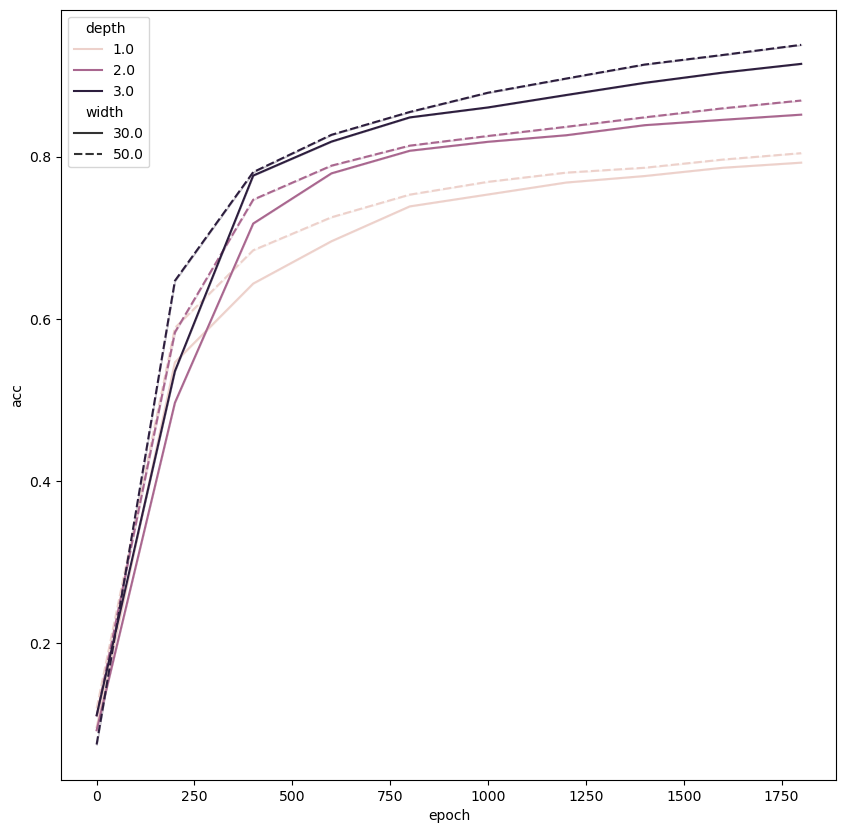

In [587]:
sns.lineplot(df_fil, x='epoch', y='acc', hue='depth', style='width')

In [632]:
from utils import *

In [772]:
from load_data import *

x_train, y_train, x_val, y_val = load_mnist('mnist', 5000, 3, True, device='cuda')

int64
Downsampling MNIST data by a factor of 3
Resulting image size: (10 x 10) 
Subsampling 5000 data points.


In [773]:
acc = []

ms = [30,50]
Ls = [1,2,3]

for m in ms:
    
    for L in Ls:
        
        ac = []

        for i in range(0,1900,100):
            filepath = 'trained_models_new/'
            filename = f'training_mnist_whitened_init=0_network_d=100_m={m}_k=10_L={L}_relu_SGD_lr=1_epoch={i}.pt'

            model = torch.load(filepath + filename)

            ac.append(accuracy(model(torch.as_tensor(x_val,dtype=torch.float64)), y_val).detach().cpu())
            
        acc.append(ac)

In [774]:
np.array(acc).shape

(6, 19)

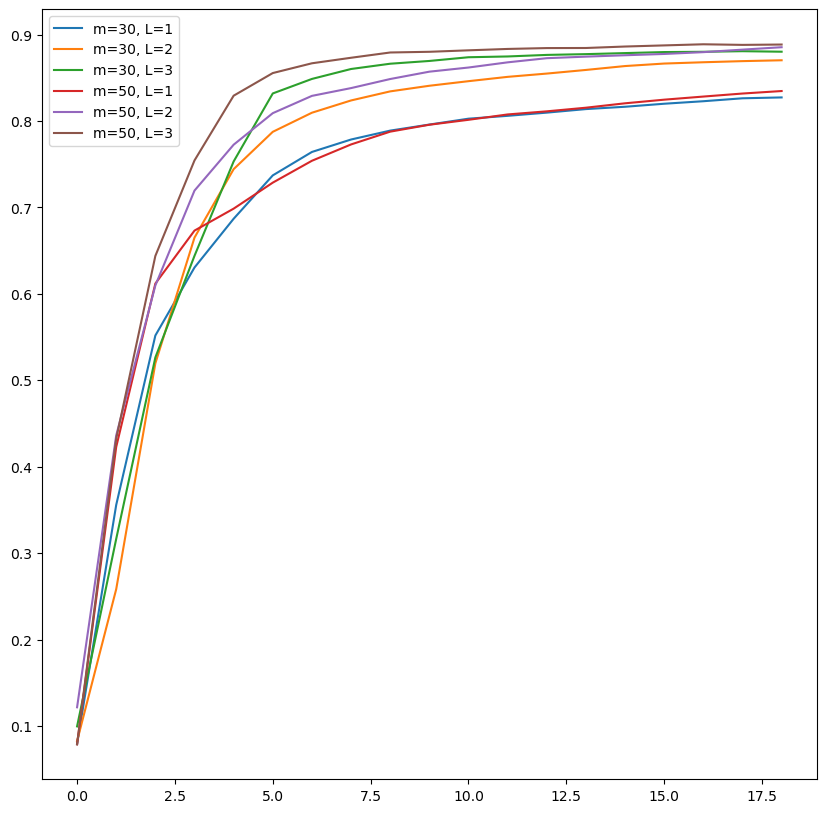

In [775]:
labels = ['m=30, L=1', 'm=30, L=2', 'm=30, L=3', 'm=50, L=1', 'm=50, L=2', 'm=50, L=3']

for i in range(len(np.array(acc))):
    plt.plot(np.array(acc)[i,:].T, label=labels[i])
    
plt.legend()

In [251]:
filename = 'full_hessian_information_trained_experiments_MNIST_whitened_linear_GD_eta=1_n=500_d=49_m=8_L=2_test.pkl'

df = load_pandas_df(file_path, filename)

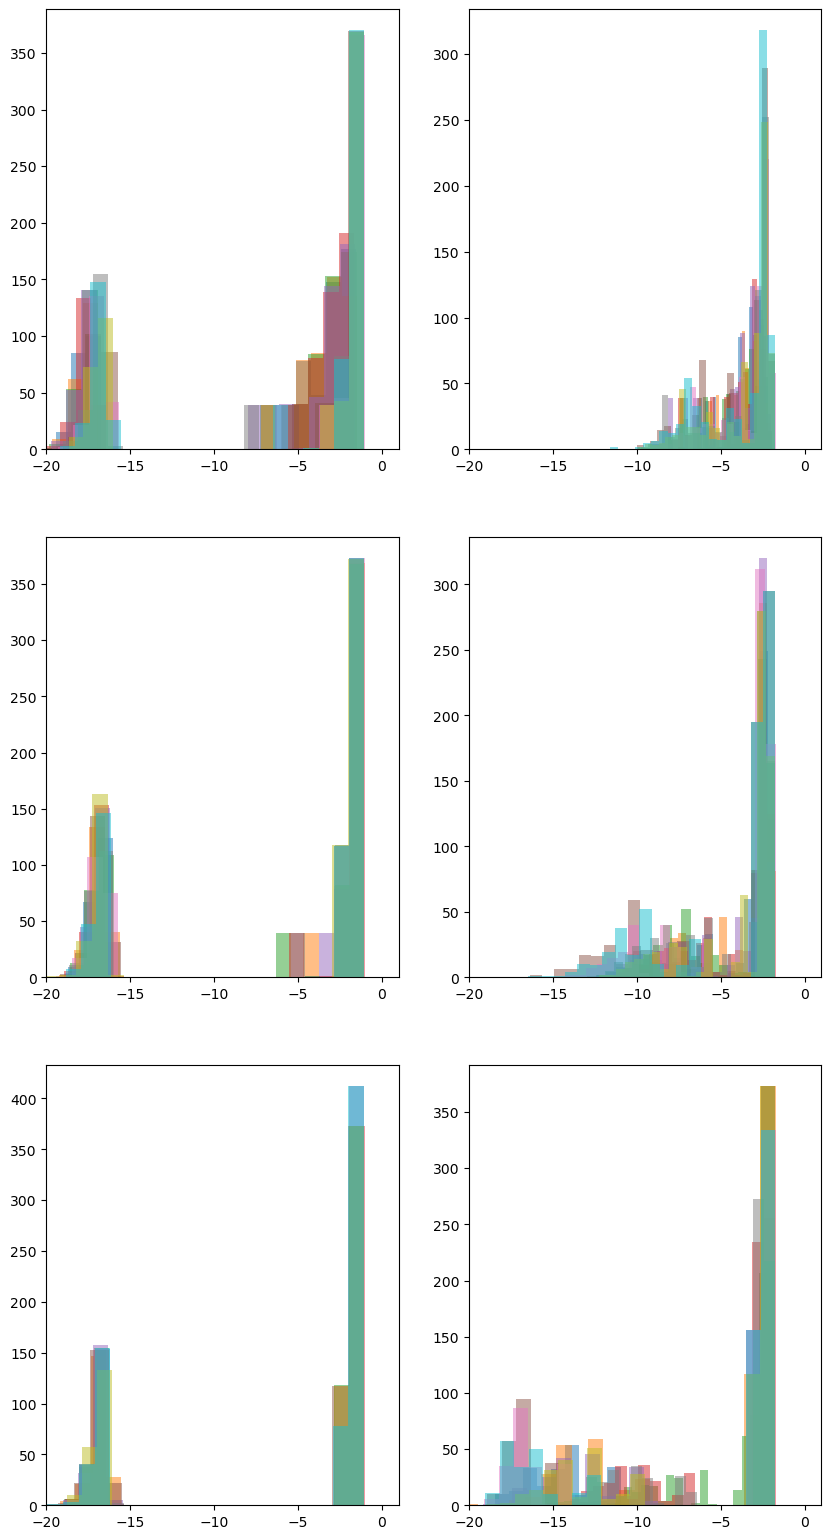

In [256]:
epochs = df.epoch.unique()

plt.figure(figsize=(10,40))
plt.subplot(len(epochs),2,1)

for ind, epoch in enumerate(epochs):
    
    H_specs_epoch = df[df['epoch']==epoch].get(['epoch', 'H_spectrum', 'H_o_spectrum'])
    
    plt.subplot(len(epochs),2, 2*int(ind/2)+1)
    
    for i in range(len(H_specs_epoch)):
        plt.hist(np.log10(H_specs_epoch.iloc[i]['H_o_spectrum']),alpha=0.5, bins=20)
    
    plt.xlim([-20,1])
    
#         plt.semilogy(H_specs_epoch.iloc[i]['H_o_spectrum'],alpha=0.5)
    
    plt.subplot(len(epochs),2, 2*int(ind/2)+2)
    
    for i in range(len(H_specs_epoch)):
        plt.hist(np.log10(H_specs_epoch.iloc[i]['H_spectrum']),alpha=0.5, bins=20)
#         plt.semilogy(H_specs_epoch.iloc[i]['H_spectrum'],alpha=0.5)
#         plt.xscale('log')
    plt.xlim([-20,1])

<Axes: xlabel='epoch', ylabel='H_o_rank'>

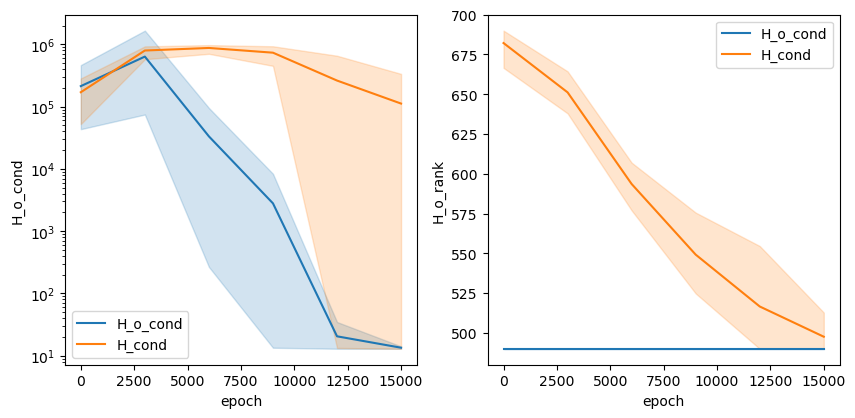

In [253]:
plt.figure()

plt.subplot(221)

g = sns.lineplot(df, x='epoch', y='H_o_cond',label='H_o_cond')
sns.lineplot(df, x='epoch', y='H_cond', label='H_cond')
g.set(yscale='log')

plt.subplot(222)

g = sns.lineplot(df, x='epoch', y='H_o_rank', label='H_o_cond')
sns.lineplot(df, x='epoch', y='H_rank', label='H_cond')

In [254]:
df

input_dim  output_dim  width  depth activ_f    epoch         H_cond  \
0        49.0        10.0   10.0    2.0  linear      0.0   24216.004018   
1        49.0        10.0   10.0    2.0  linear   3000.0  371767.828406   
2        49.0        10.0   10.0    2.0  linear   6000.0  937032.536292   
3        49.0        10.0   10.0    2.0  linear   9000.0  713940.226217   
4        49.0        10.0   10.0    2.0  linear  12000.0      13.409321   
5        49.0        10.0   10.0    2.0  linear  14999.0      13.409321   
6        49.0        10.0   10.0    2.0  linear      0.0   27727.278489   
7        49.0        10.0   10.0    2.0  linear   3000.0  925563.564102   
8        49.0        10.0   10.0    2.0  linear   6000.0  987960.746901   
9        49.0        10.0   10.0    2.0  linear   9000.0  927949.828694   
10       49.0        10.0   10.0    2.0  linear  12000.0      12.537207   
11       49.0        10.0   10.0    2.0  linear  14999.0      12.537207   
12       49.0        10.0   10.0    2.0  linear      0.0  308664.952874   
13       49.0        10.0   10.0    2.0  linear   3000.0  940057.008824   
14       49.0        10.0   10.0    2.0  linear   6000.0  542178.107962   
15       49.0        10.0   10.0    2.0  linear   9000.0  879363.044341   
16       49.0        10.0   10.0    2.0  linear  12000.0  987459.945810   
17       49.0        10.0   10.0    2.0  linear  14999.0  560503.467467   
18       49.0        10.0   10.0    2.0  linear      0.0  333949.357179   
19       49.0        10.0   10.0    2.0  linear   3000.0  915907.469359   
20       49.0        10.0   10.0    2.0  linear   6000.0  949104.711921   
21       49.0        10.0   10.0    2.0  linear   9000.0  965611.585646   
22       49.0        10.0   10.0    2.0  linear  12000.0  325628.627741   
23       49.0        10.0   10.0    2.0  linear  14999.0      13.022658   
24       49.0        10.0   10.0    2.0  linear      0.0  158363.426468   
25       49.0        10.0   10.0    2.0  linear   3000.0  835180.828705   
26       49.0        10.0   10.0    2.0  linear   6000.0  967142.038404   
27       49.0        10.0   10.0    2.0  linear   9000.0  194515.127936   
28       49.0        10.0   10.0    2.0  linear  12000.0      14.724122   
29       49.0        10.0   10.0    2.0  linear  14999.0      14.724114   

        H_o_cond  lam_abs_min_H  lam_abs_max_H  lam_abs_min_H_o  \
0   1.219331e+04   4.412241e-07       0.010685     2.206121e-06   
1   2.223959e+04   4.915776e-08       0.018275     4.108703e-06   
2   5.135655e+01   1.953540e-08       0.018305     1.782175e-03   
3   1.340973e+01   2.571948e-08       0.018362     6.846582e-03   
4   1.340932e+01   1.369359e-03       0.018362     6.846797e-03   
5   1.340932e+01   1.369359e-03       0.018362     6.846797e-03   
6   1.723136e+04   3.885721e-07       0.010774     1.942860e-06   
7   8.370026e+04   2.000115e-08       0.018512     1.105808e-06   
8   1.038941e+03   1.880714e-08       0.018581     8.941964e-05   
9   1.254105e+01   2.013223e-08       0.018682     7.448222e-03   
10  1.253721e+01   1.490102e-03       0.018682     7.450511e-03   
11  1.253721e+01   1.490102e-03       0.018682     7.450511e-03   
12  1.671923e+05   3.941860e-08       0.012167     1.970930e-07   
13  2.689643e+06   1.937597e-08       0.018215     3.385979e-08   
14  1.554731e+05   3.371487e-08       0.018279     5.878655e-07   
15  1.390038e+04   2.078506e-08       0.018278     6.574488e-06   
16  4.863119e+01   1.848434e-08       0.018253     1.876596e-03   
17  1.343866e+01   3.257201e-08       0.018257     6.792613e-03   
18  1.587423e+05   2.871372e-08       0.009589     1.435686e-07   
19  2.296970e+05   1.857826e-08       0.017016     3.703840e-07   
20  9.882560e+03   1.791181e-08       0.017000     8.601084e-06   
21  4.868364e+01   1.761420e-08       0.017008     1.746824e-03   
22  1.302811e+01   5.230751e-08       0.017033     6.536954e-03   
23  1.302266e+01   1.307940e-03       0.017033     6.539699e-03   
24 

In [259]:
num_inits = 5

dfs = []
for i in range(num_inits):
    filename = f'training_information_test_mnist_whitened_init={i}_d=49_m=[10]_L=[2]_linear_SGD_lr=2.pkl'
    df = load_pandas_df(file_path, filename)

    df.insert(0,'init',i)
    
    dfs.append(df)
    
df = pd.concat(dfs)

In [258]:
df

init  width  depth activ_f    epoch      loss  grad_norm_squared  \
0         0   10.0    2.0  linear      0.0  0.104409       1.053460e-04   
1         0   10.0    2.0  linear      1.0  0.104304       1.039991e-04   
2         0   10.0    2.0  linear      2.0  0.104201       1.026880e-04   
3         0   10.0    2.0  linear      3.0  0.104098       1.014115e-04   
4         0   10.0    2.0  linear      4.0  0.103997       1.001684e-04   
...     ...    ...    ...     ...      ...       ...                ...   
14995     4   10.0    2.0  linear  14995.0  0.051286       1.282520e-15   
14996     4   10.0    2.0  linear  14996.0  0.051286       1.279403e-15   
14997     4   10.0    2.0  linear  14997.0  0.051286       1.276294e-15   
14998     4   10.0    2.0  linear  14998.0  0.051286       1.273192e-15   
14999     4   10.0    2.0  linear  14999.0  0.051286       1.270098e-15   

       full_grad_norm  dist_to_init  
0        1.026382e-02      0.000000  
1        1.019800e-02      0.003188  
2        1.013351e-02      0.006357  
3        1.007033e-02      0.009507  
4        1.000841e-02      0.012640  
...               ...           ...  
14995    3.581229e-08      2.659624  
14996    3.576875e-08      2.659624  
14997    3.572526e-08      2.659624  
14998    3.568182e-08      2.659624  
14999    3.563844e-08      2.659624  

[75000 rows x 9 columns]

<Axes: xlabel='epoch', ylabel='dist_to_init'>

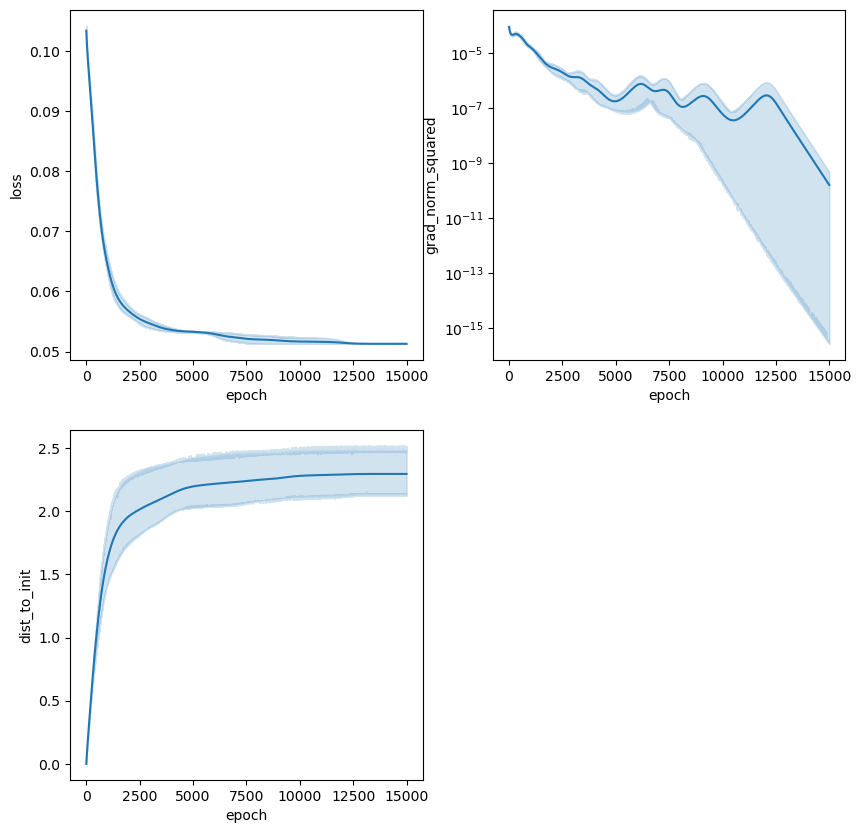

In [241]:
plt.figure
plt.subplot(221)

sns.lineplot(df, x='epoch', y='loss')

plt.subplot(222)

g = sns.lineplot(df, x='epoch', y='grad_norm_squared')
g.set(yscale='log')

plt.subplot(223)

sns.lineplot(df, x='epoch', y='dist_to_init')

In [504]:
filename = 'full_hessian_information_trained_experiments_MNIST_whitened_linear_GD_eta=2_n=500_d=49_m=8_L=3.pkl'

df = load_pandas_df(file_path, filename)

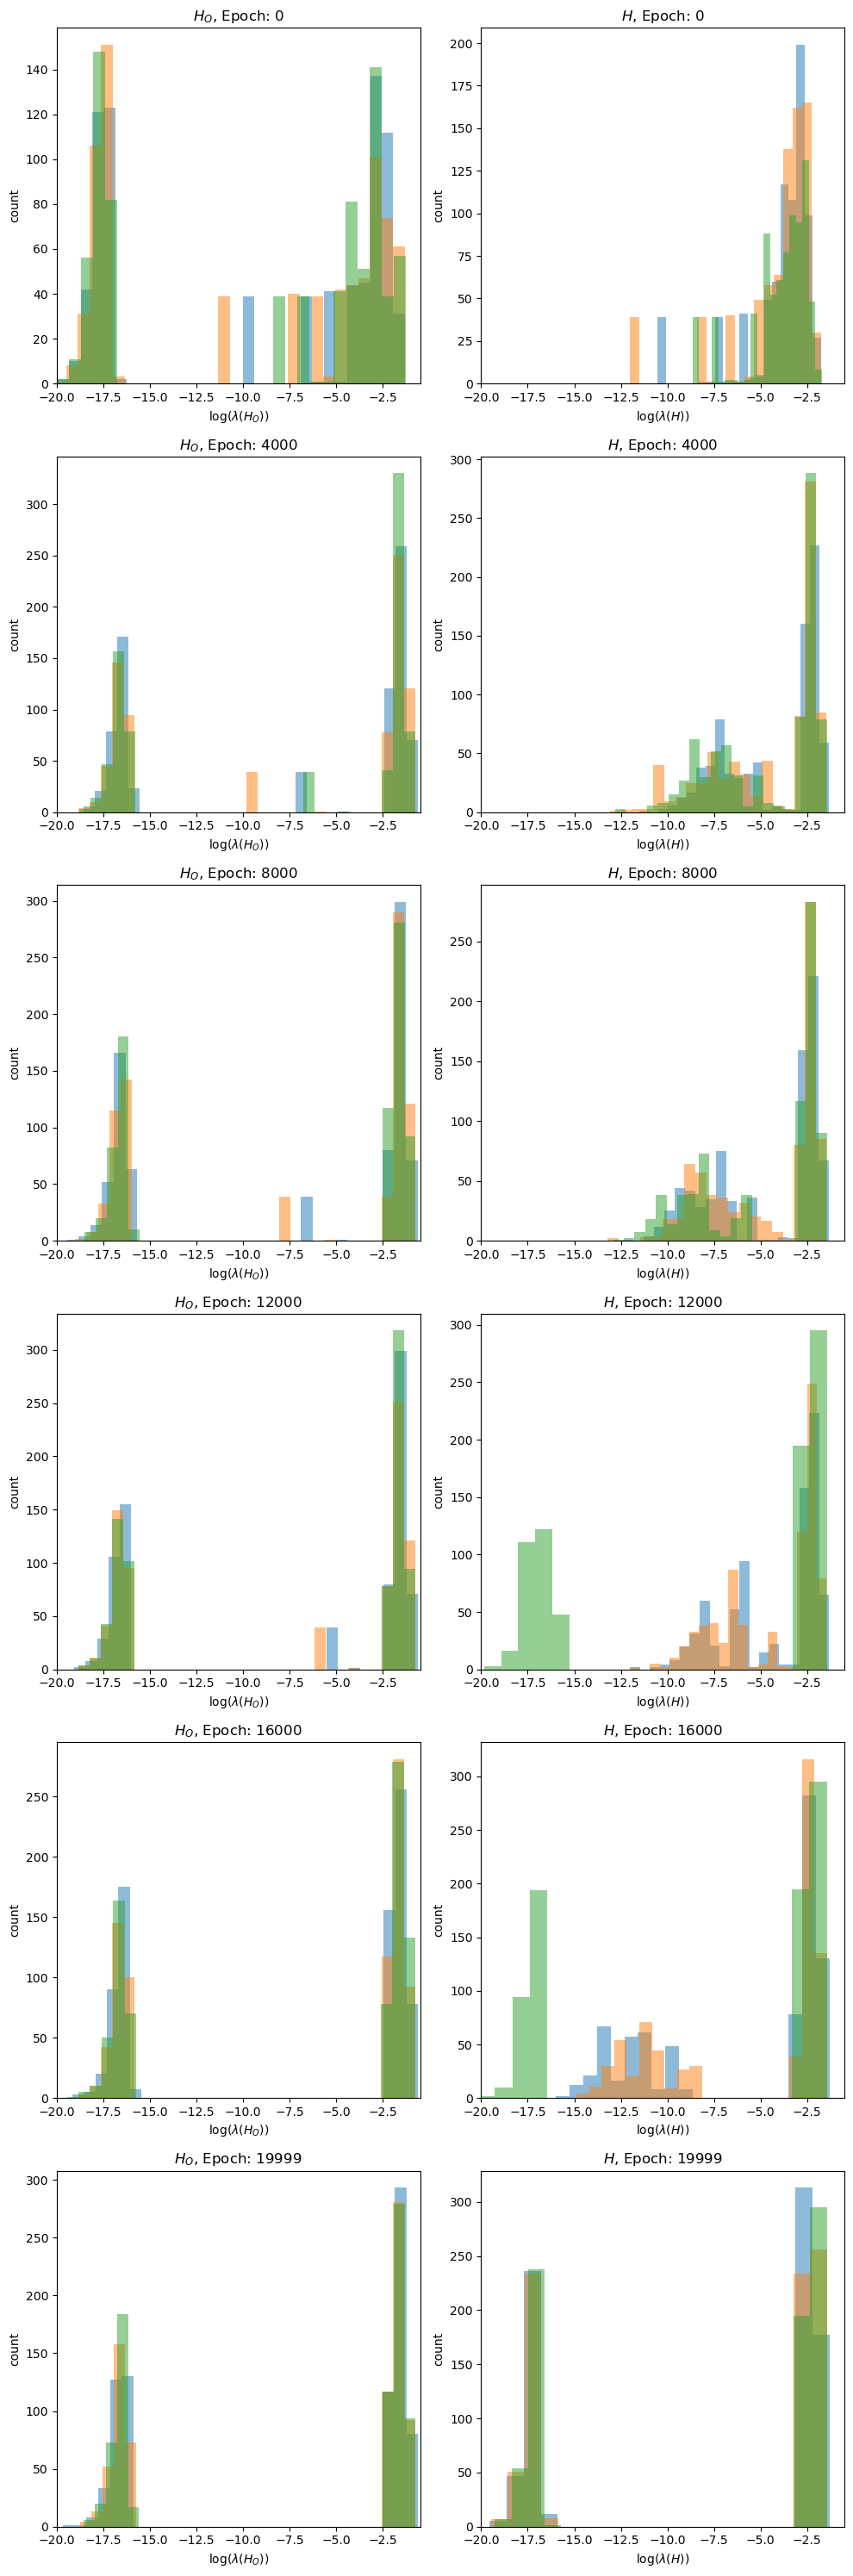

In [514]:
epochs = df.epoch.unique()

f = plt.figure(figsize=(10,30))

plt.subplot(len(epochs),2,1)

for ind, epoch in enumerate(epochs):
    
#     print(epoch)
    H_specs_epoch = df[df['epoch']==epoch].get(['epoch', 'H_spectrum', 'H_o_spectrum'])
    
    plt.subplot(len(epochs), 2, 2*int(ind)+1)
    
    for i in range(len(H_specs_epoch)-3, len(H_specs_epoch)):
        plt.hist(np.log10(H_specs_epoch.iloc[i]['H_o_spectrum']),alpha=0.5, bins=30, label=f'{i}')
        
#         print('H_O: ', H_specs_epoch.iloc[i]['H_o_spectrum'][-1]/H_specs_epoch.iloc[i]['H_o_spectrum'][-490])
        
    plt.xlim([-20,-0.5])
    plt.title(f'$H_O$, Epoch: {int(epoch)}')
    plt.xlabel(r'$\log(\lambda(H_O))$')
    plt.ylabel('count')
#     plt.legend()
    
#         plt.semilogy(H_specs_epoch.iloc[i]['H_o_spectrum'],alpha=0.5)
    
    
    plt.subplot(len(epochs), 2, 2*int(ind)+2)
    
    for i in range(len(H_specs_epoch)-3, len(H_specs_epoch)):
        plt.hist(np.log10(H_specs_epoch.iloc[i]['H_spectrum']),alpha=0.5, bins=20)
        
#         print('H_L: ', H_specs_epoch.iloc[i]['H_spectrum'][-1]/H_specs_epoch.iloc[i]['H_spectrum'][0])
        
#         plt.semilogy(H_specs_epoch.iloc[i]['H_spectrum'],alpha=0.5)
#         plt.xscale('log')
    plt.xlim([-20,-0.5])
    plt.title(f'$H$, Epoch: {int(epoch)}')
    plt.xlabel(r'$\log(\lambda(H))$')
    plt.ylabel('count')
f.tight_layout()

plt.savefig('Spectrum_during_training_MNIST_whitened_linear_GD_eta=2_n=500_d=49_m=8_L=3.pdf', bbox_inches='tight')

In [361]:
df

input_dim  output_dim  width  depth activ_f  epoch         H_cond  \
0        49.0        10.0   10.0    3.0  linear    0.0  248068.010526   
1        49.0        10.0   10.0    3.0  linear   50.0  616048.779217   
2        49.0        10.0   10.0    3.0  linear  100.0  511056.744258   
3        49.0        10.0   10.0    3.0  linear  150.0  456957.508581   
4        49.0        10.0   10.0    3.0  linear  200.0  342045.374708   
5        49.0        10.0   10.0    3.0  linear  250.0  361301.601200   
6        49.0        10.0   10.0    3.0  linear  300.0  883745.371742   
7        49.0        10.0   10.0    3.0  linear  350.0  993721.875597   
8        49.0        10.0   10.0    3.0  linear  400.0  908975.801985   
9        49.0        10.0   10.0    3.0  linear  450.0  953010.565434   
10       49.0        10.0   10.0    3.0  linear  500.0  911854.195818   
11       49.0        10.0   10.0    3.0  linear  500.0  911854.195818   
12       49.0        10.0   10.0    3.0  linear    0.0  106957.093517   
13       49.0        10.0   10.0    3.0  linear   50.0  146001.610794   
14       49.0        10.0   10.0    3.0  linear  100.0  758081.027456   
15       49.0        10.0   10.0    3.0  linear  150.0  218759.767797   
16       49.0        10.0   10.0    3.0  linear  200.0  273708.600789   
17       49.0        10.0   10.0    3.0  linear  250.0  849667.577001   
18       49.0        10.0   10.0    3.0  linear  300.0  892178.951103   
19       49.0        10.0   10.0    3.0  linear  350.0  856319.066860   
20       49.0        10.0   10.0    3.0  linear  400.0  795406.787825   
21       49.0        10.0   10.0    3.0  linear  450.0  593478.127021   
22       49.0        10.0   10.0    3.0  linear  500.0  839280.934403   
23       49.0        10.0   10.0    3.0  linear  500.0  839280.934403   
24       49.0        10.0   10.0    3.0  linear    0.0  520421.976929   
25       49.0        10.0   10.0    3.0  linear   50.0  261399.611626   
26       49.0        10.0   10.0    3.0  linear  100.0  942964.361520   
27       49.0        10.0   10.0    3.0  linear  150.0  699590.861730   
28       49.0        10.0   10.0    3.0  linear  200.0  582501.752967   
29       49.0        10.0   10.0    3.0  linear  250.0  728082.420256   
30       49.0        10.0   10.0    3.0  linear  300.0  414775.871187   
31       49.0        10.0   10.0    3.0  linear  350.0  733208.340186   
32       49.0        10.0   10.0    3.0  linear  400.0  741854.368540   
33       49.0        10.0   10.0    3.0  linear  450.0  825236.972331   
34       49.0        10.0   10.0    3.0  linear  500.0  599078.447204   
35       49.0        10.0   10.0    3.0  linear  500.0  599078.447204   
36       49.0        10.0   10.0    3.0  linear    0.0  448875.381981   
37       49.0        10.0   10.0    3.0  linear   50.0  462994.320798   
38       49.0        10.0   10.0    3.0  linear  100.0  989470.719606   
39       49.0        10.0   10.0    3.0  linear  150.0  320841.530523   
40       49.0        10.0   10.0    3.0  linear  200.0  820835.050810   
41       49.0        10.0   10.0    3.0  linear  250.0  993312.379664   
42       49.0        10.0   10.0    3.0  linear  300.0  852025.873540   
43       49.0        10.0   10.0    3.0  linear  350.0  701137.529201   
44       49.0        10.0   10.0    3.0  linear  400.0  782348.934800   
45       49.0        10.0   10.0    3.0  linear  450.0  897482.568595   
46       49.0        10.0   10.0    3.0  linear  500.0  882294.323406   
47       49.0        10.0   10.0    3.0  linear  500.0  882294.323406   
48       49.0        10.0   10.0    3.0  linear    0.0  756223.167245   
49       49.0        10.0   10.0    3.0  linear   50.0  149584.612777   
50       49.0        10.0   10.0    3.0  linear  100.0  248109.001049   
51       49.0        10.0   10.0    3.0  linear  150.0   67378.176274   
52       49.0        10.0   10.0    3.0  linear  200.0  301925.819654   
53       49.0        10.0   10.0    3.0  linear  250.0  188444

<Axes: xlabel='epoch', ylabel='H_o_rank'>

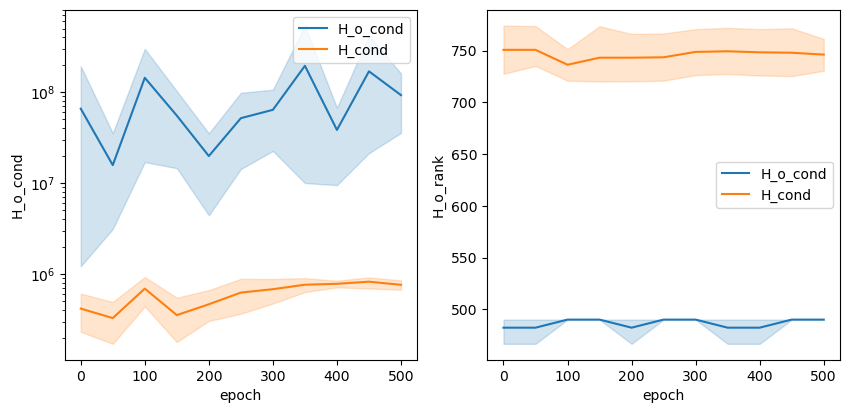

In [362]:
plt.figure()

plt.subplot(221)

g = sns.lineplot(df, x='epoch', y='H_o_cond',label='H_o_cond')
sns.lineplot(df, x='epoch', y='H_cond', label='H_cond')
g.set(yscale='log')

plt.subplot(222)

g = sns.lineplot(df, x='epoch', y='H_o_rank', label='H_o_cond')
sns.lineplot(df, x='epoch', y='H_rank', label='H_cond')

In [ ]:
df[df['epoch']<100]

In [488]:
filename = 'full_hessian_information_trained_experiments_MNIST_whitened_linear_GD_eta=1_n=500_d=49_m=[10,15,20,25,30]_L=1.pkl'
filename1 = 'full_hessian_information_trained_experiments_MNIST_whitened_linear_GD_eta=1_n=500_d=49_m=[35,40,45,50,55,60]_L=1.pkl'

df = load_pandas_df(file_path,filename)
df1 = load_pandas_df(file_path,filename1)

df_H = pd.concat([df,df1])
df_H.head()

input_dim  output_dim  width  depth activ_f  epoch       H_cond  \
0       49.0        10.0   10.0    1.0  linear    0.0   349.651868   
1       49.0        10.0   10.0    1.0  linear    0.0   349.651868   
2       49.0        10.0   10.0    1.0  linear    0.0  2341.640572   
3       49.0        10.0   10.0    1.0  linear    0.0  2341.640572   
4       49.0        10.0   10.0    1.0  linear    0.0   956.662871   

      H_o_cond  lam_abs_min_H  lam_abs_max_H  lam_abs_min_H_o  \
0   164.677468       0.000011       0.003996         0.000057   
1   164.677468       0.000011       0.003996         0.000057   
2  1163.155125       0.000002       0.004126         0.000009   
3  1163.155125       0.000002       0.004126         0.000009   
4   592.580803       0.000005       0.004358         0.000023   

   lam_abs_max_H_o  mean_diff_H_H_o  max_diff_H_H_o  std_diff_H_H_o  H_rank  \
0         0.009411     2.059921e-07        0.000908        0.000121   590.0   
1         0.009411     2.059921e-07        0.000908        0.000121   590.0   
2         0.010247     1.975489e-07        0.001069        0.000116   590.0   
3         0.010247     1.975489e-07        0.001069        0.000116   590.0   
4         0.013497     2.459728e-07        0.001283        0.000145   590.0   

   H_o_rank                                         H_spectrum  \
0     490.0  [1.1429449533433534e-05, 1.1429449533434022e-0...   
1     490.0  [1.1429449533433534e-05, 1.1429449533434022e-0...   
2     490.0  [1.7619004918337654e-06, 1.7619004918338004e-0...   
3     490.0  [1.7619004918337654e-06, 1.7619004918338004e-0...   
4     490.0  [4.555188692722892e-06, 4.5551886927229774e-06...   

                                        H_o_spectrum  
0  [2.417307680584234e-20, 3.0788758235743766e-20...  
1  [2.417307680584234e-20, 3.0788758235743766e-20...  
2  [5.530561898582784e-20, 7.716703370413164e-20,...  
3  [5.530561898582784e-20, 7.716703370413164e-20,...  
4  [8.313206413785903e-21, 1.488361590200475e-20,...

In [489]:
# filename = 'outer_prod_hessian_information_trained_experiments_MNIST_whitened_linear_GD_eta=1_n=500_d=49_m=[10,15,20,25,30]_L=1.pkl'
# filename1 = 'outer_prod_hessian_information_trained_experiments_MNIST_whitened_linear_GD_eta=1_n=500_d=49_m=[35,40,45,50,55,60]_L=1.pkl'

# df = load_pandas_df(file_path,filename)
# df1 = load_pandas_df(file_path,filename1)

# df_H_O = pd.concat([df,df1])
# df_H_O.head()

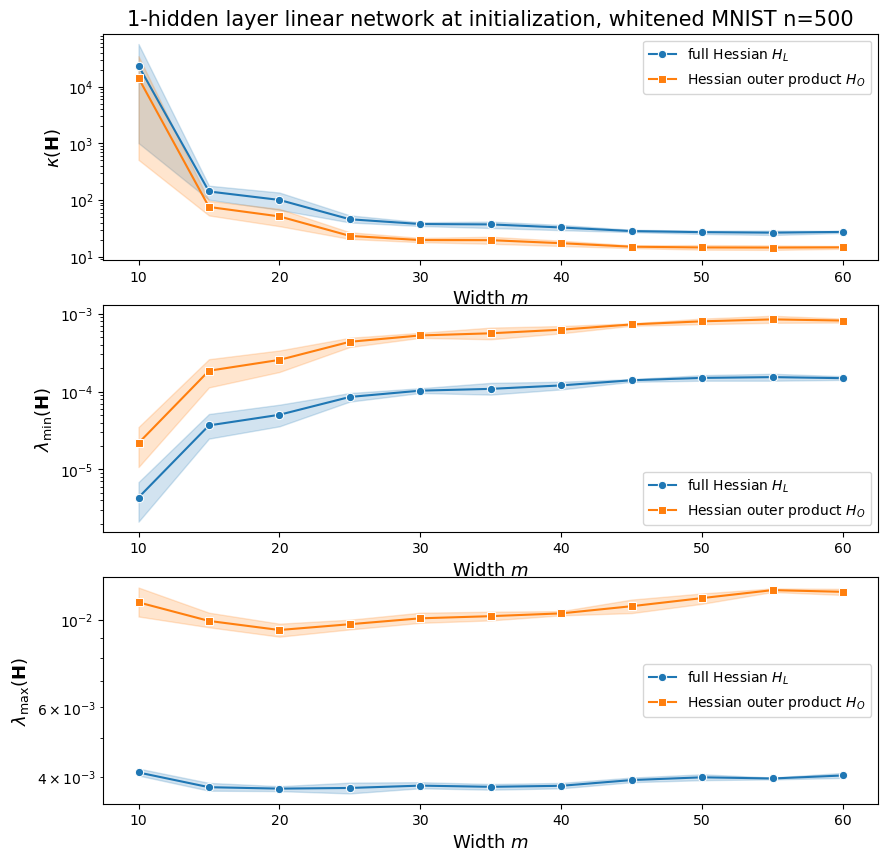

In [490]:
plt.figure(figsize=(10,10))

plt.subplot(311)

g=sns.lineplot(df_H, x='width', y='H_cond',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H, x='width', y='H_o_cond',marker='s',label='Hessian outer product $H_O$')

g.set_ylabel(r'$\kappa(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

g.set(yscale='log')

plt.title('1-hidden layer linear network at initialization, whitened MNIST n=500', fontsize=15)

plt.subplot(312)

g=sns.lineplot(df_H, x='width', y='lam_abs_min_H',marker='o',label=r'full Hessian $H_L$')
sns.lineplot(df_H, x='width', y='lam_abs_min_H_o',marker='s',label=r'Hessian outer product $H_O$')

g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\min}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

plt.subplot(313)

g=sns.lineplot(df_H, x='width', y='lam_abs_max_H',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H, x='width', y='lam_abs_max_H_o',marker='s',label='Hessian outer product $H_O$')
g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\max}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)


plt.savefig('conditioning_evals_fullHess_vs_H_O_initialization.jpg', bbox_inches='tight')


/tmp/ipykernel_3477577/1027534030.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(widths), 2, 2*int(ind)+1)


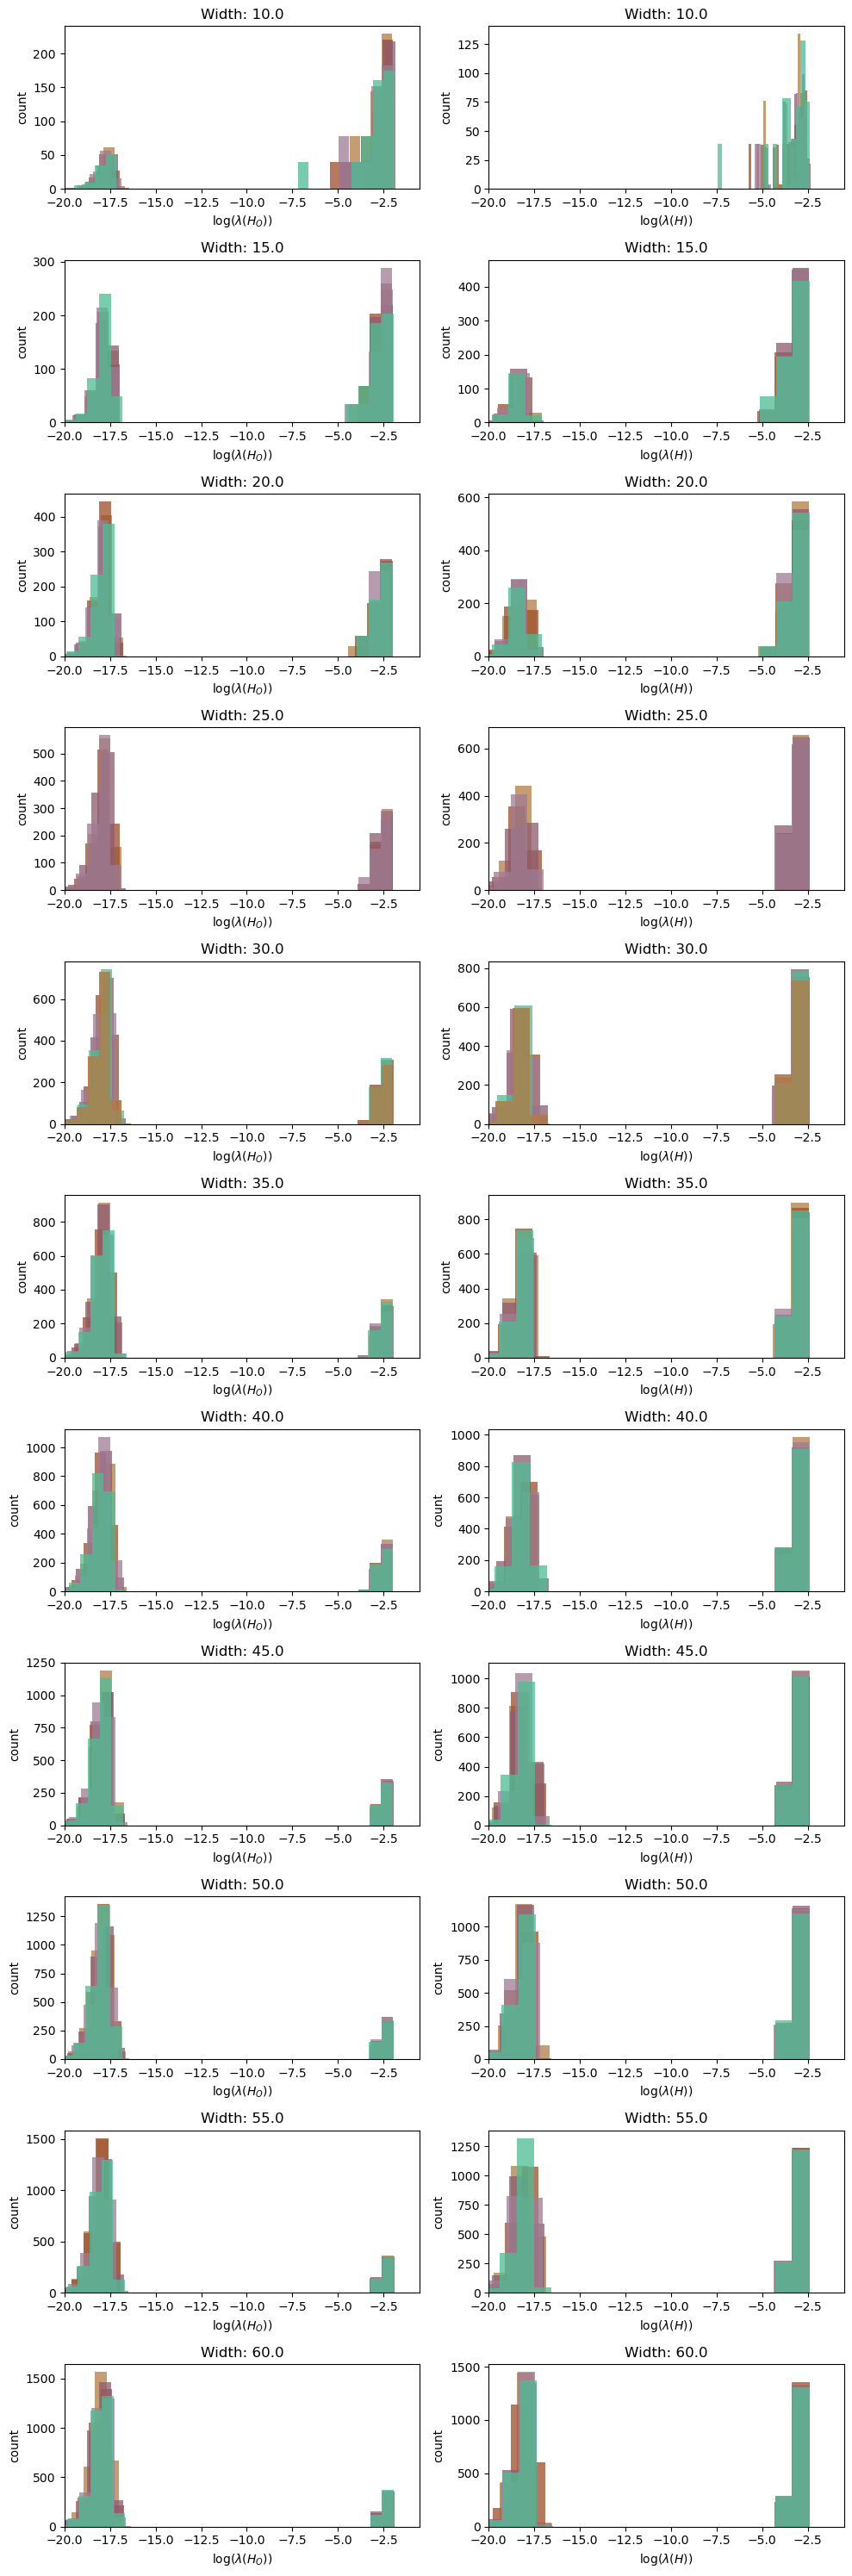

In [492]:
widths = df_H.width.unique()

f = plt.figure(figsize=(10,30))

plt.subplot(len(epochs),2,1)

for ind, width in enumerate(widths):
    
#     print(epoch)
    H_specs_width = df_H[df_H['width']==width].get(['epoch', 'H_spectrum', 'H_o_spectrum'])
    
    plt.subplot(len(widths), 2, 2*int(ind)+1)
    
    for i in range(len(H_specs_width)):
        plt.hist(np.log10(H_specs_width.iloc[i]['H_o_spectrum']),alpha=0.5, bins=30, label=f'{i}')
        
#         print('H_O: ', H_specs_epoch.iloc[i]['H_o_spectrum'][-1]/H_specs_epoch.iloc[i]['H_o_spectrum'][-490])
        
    plt.xlim([-20,-0.5])
    plt.title(f'Width: {width}')
    plt.xlabel(r'$\log(\lambda(H_O))$')
    plt.ylabel('count')
#     plt.legend()
    
#         plt.semilogy(H_specs_epoch.iloc[i]['H_o_spectrum'],alpha=0.5)
    
    
    plt.subplot(len(widths), 2, 2*int(ind)+2)
    
    for i in range(len(H_specs_width)):
        plt.hist(np.log10(H_specs_width.iloc[i]['H_spectrum']),alpha=0.5, bins=20)
        
#         print('H_L: ', H_specs_epoch.iloc[i]['H_spectrum'][-1]/H_specs_epoch.iloc[i]['H_spectrum'][0])
        
#         plt.semilogy(H_specs_epoch.iloc[i]['H_spectrum'],alpha=0.5)
#         plt.xscale('log')
    plt.xlim([-20,-0.5])
    plt.title(f'Width: {width}')
    plt.xlabel(r'$\log(\lambda(H))$')
    plt.ylabel('count')
    
f.tight_layout()

In [485]:
filename = 'full_hessian_information_trained_experiments_MNIST_whitened_linear_GD_eta=1_n=500_d=49_m=[10,15,20,25,30,35,40,45,50,55,60]_L=2.pkl'

df_H_L2 = load_pandas_df(file_path, filename)
# df_H.tail(10)

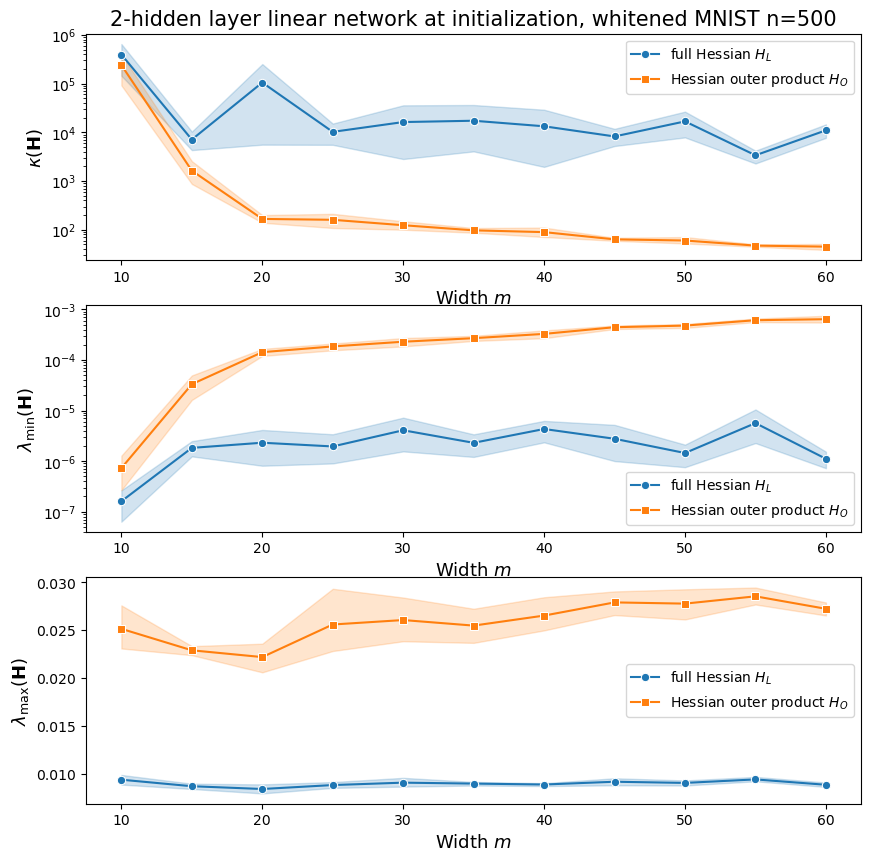

In [486]:
plt.figure(figsize=(10,10))

plt.subplot(311)

g=sns.lineplot(df_H_L2, x='width', y='H_cond',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_L2, x='width', y='H_o_cond',marker='s',label='Hessian outer product $H_O$')

g.set_ylabel(r'$\kappa(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

g.set(yscale='log')

plt.title('2-hidden layer linear network at initialization, whitened MNIST n=500', fontsize=15)

plt.subplot(312)

g=sns.lineplot(df_H_L2, x='width', y='lam_abs_min_H',marker='o',label=r'full Hessian $H_L$')
sns.lineplot(df_H_L2, x='width', y='lam_abs_min_H_o',marker='s',label=r'Hessian outer product $H_O$')

g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\min}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

plt.subplot(313)

g=sns.lineplot(df_H_L2, x='width', y='lam_abs_max_H',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_L2, x='width', y='lam_abs_max_H_o',marker='s',label='Hessian outer product $H_O$')
# g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\max}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)


plt.savefig('conditioning_evals_fullHess_vs_H_O_initialization_L=2.jpg', bbox_inches='tight')


/tmp/ipykernel_3477577/142662306.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(widths), 2, 2*int(ind)+1)


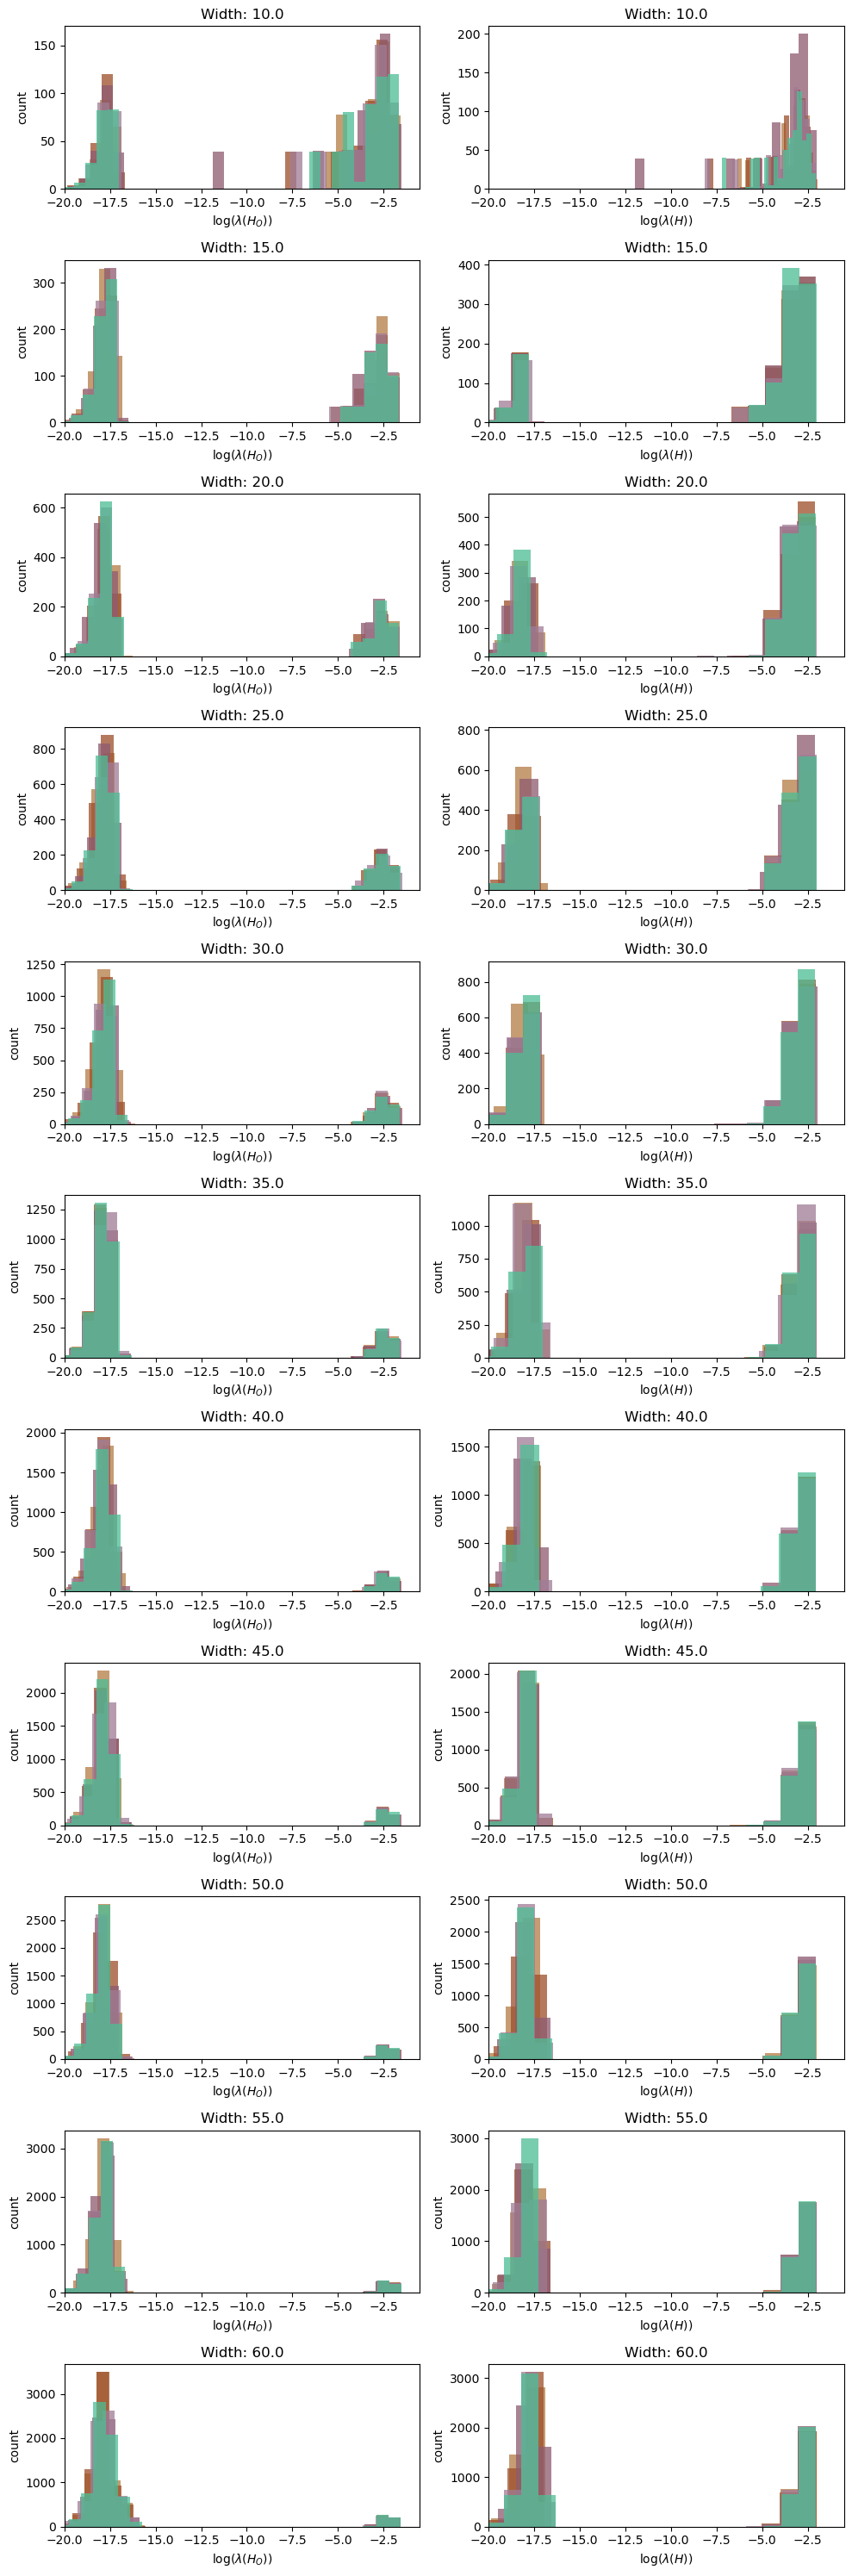

In [487]:
widths = df_H_L2.width.unique()

f = plt.figure(figsize=(10,30))

plt.subplot(len(epochs),2,1)

for ind, width in enumerate(widths):
    
#     print(epoch)
    H_specs_width = df_H_L2[df_H_L2['width']==width].get(['epoch', 'H_spectrum', 'H_o_spectrum'])
    
    plt.subplot(len(widths), 2, 2*int(ind)+1)
    
    for i in range(len(H_specs_width)):
        plt.hist(np.log10(H_specs_width.iloc[i]['H_o_spectrum']),alpha=0.5, bins=30, label=f'{i}')
        
#         print('H_O: ', H_specs_epoch.iloc[i]['H_o_spectrum'][-1]/H_specs_epoch.iloc[i]['H_o_spectrum'][-490])
        
    plt.xlim([-20,-0.5])
    plt.title(f'Width: {width}')
    plt.xlabel(r'$\log(\lambda(H_O))$')
    plt.ylabel('count')
#     plt.legend()
    
#         plt.semilogy(H_specs_epoch.iloc[i]['H_o_spectrum'],alpha=0.5)
    
    
    plt.subplot(len(widths), 2, 2*int(ind)+2)
    
    for i in range(len(H_specs_width)):
        plt.hist(np.log10(H_specs_width.iloc[i]['H_spectrum']),alpha=0.5, bins=20)
        
#         print('H_L: ', H_specs_epoch.iloc[i]['H_spectrum'][-1]/H_specs_epoch.iloc[i]['H_spectrum'][0])
        
#         plt.semilogy(H_specs_epoch.iloc[i]['H_spectrum'],alpha=0.5)
#         plt.xscale('log')
    plt.xlim([-20,-0.5])
    plt.title(f'Width: {width}')
    plt.xlabel(r'$\log(\lambda(H))$')
    plt.ylabel('count')
    
f.tight_layout()

In [500]:
filename = 'full_hessian_information_trained_experiments_MNIST_whitened_linear_GD_eta=1_n=500_d=49_m=[10,15,20,25,30]_L=3.pkl'

df_H_L2 = load_pandas_df(file_path, filename)
# df_H.tail(10)

Text(0.5, 0, 'Width $m$')

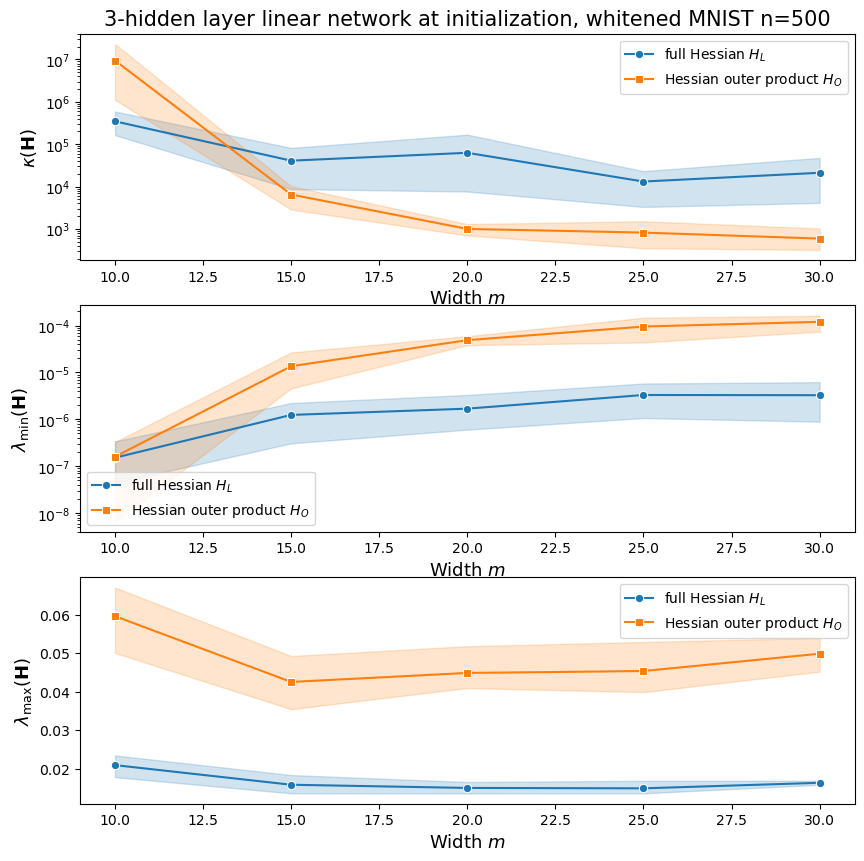

In [501]:
plt.figure(figsize=(10,10))

plt.subplot(311)

g=sns.lineplot(df_H_L2, x='width', y='H_cond',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_L2, x='width', y='H_o_cond',marker='s',label='Hessian outer product $H_O$')

g.set_ylabel(r'$\kappa(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

g.set(yscale='log')

plt.title('3-hidden layer linear network at initialization, whitened MNIST n=500', fontsize=15)

plt.subplot(312)

g=sns.lineplot(df_H_L2, x='width', y='lam_abs_min_H',marker='o',label=r'full Hessian $H_L$')
sns.lineplot(df_H_L2, x='width', y='lam_abs_min_H_o',marker='s',label=r'Hessian outer product $H_O$')

g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\min}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

plt.subplot(313)

g=sns.lineplot(df_H_L2, x='width', y='lam_abs_max_H',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_L2, x='width', y='lam_abs_max_H_o',marker='s',label='Hessian outer product $H_O$')
# g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\max}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)


# plt.savefig('conditioning_evals_fullHess_vs_H_O_initialization_L=3.jpg', bbox_inches='tight')


In [498]:
filename = 'full_hessian_information_trained_experiments_MNIST_whitened_relu_GD_eta=1_n=500_d=49_m=[10,15,20,25,30,35,40,45,50,55,60]_L=1.pkl'

df_H_relu = load_pandas_df(file_path, filename)

Text(0.5, 0, 'Width $m$')

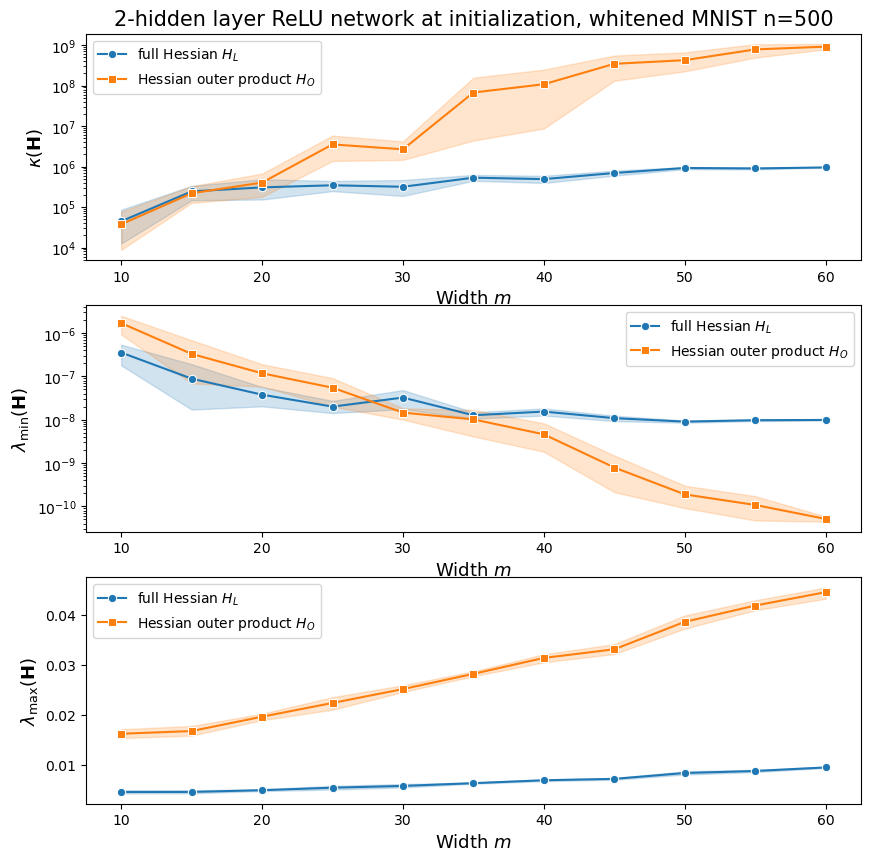

In [499]:
plt.figure(figsize=(10,10))

plt.subplot(311)

g=sns.lineplot(df_H_relu, x='width', y='H_cond',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_relu, x='width', y='H_o_cond',marker='s',label='Hessian outer product $H_O$')

g.set_ylabel(r'$\kappa(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

g.set(yscale='log')

plt.title('2-hidden layer ReLU network at initialization, whitened MNIST n=500', fontsize=15)

plt.subplot(312)

g=sns.lineplot(df_H_relu, x='width', y='lam_abs_min_H',marker='o',label=r'full Hessian $H_L$')
sns.lineplot(df_H_relu, x='width', y='lam_abs_min_H_o',marker='s',label=r'Hessian outer product $H_O$')

g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\min}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

plt.subplot(313)

g=sns.lineplot(df_H_relu, x='width', y='lam_abs_max_H',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_relu, x='width', y='lam_abs_max_H_o',marker='s',label='Hessian outer product $H_O$')
# g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\max}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)


# plt.savefig('conditioning_evals_fullHess_vs_H_O_initialization_ReLU_L=2.jpg', bbox_inches='tight')


In [494]:
filename = 'full_hessian_information_trained_experiments_MNIST_whitened_relu_GD_eta=1_n=500_d=49_m=[10,15,20,25,30]_L=2.pkl'

df_H_relu = load_pandas_df(file_path, filename)

Text(0.5, 0, 'Width $m$')

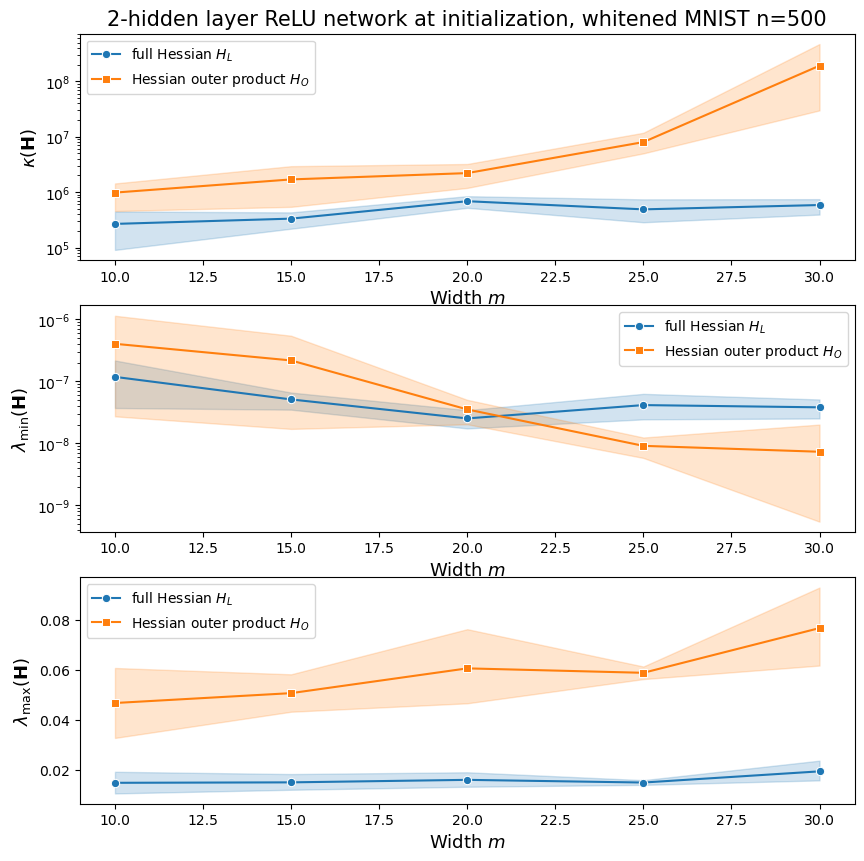

In [495]:
plt.figure(figsize=(10,10))

plt.subplot(311)

g=sns.lineplot(df_H_relu, x='width', y='H_cond',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_relu, x='width', y='H_o_cond',marker='s',label='Hessian outer product $H_O$')

g.set_ylabel(r'$\kappa(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

g.set(yscale='log')

plt.title('2-hidden layer ReLU network at initialization, whitened MNIST n=500', fontsize=15)

plt.subplot(312)

g=sns.lineplot(df_H_relu, x='width', y='lam_abs_min_H',marker='o',label=r'full Hessian $H_L$')
sns.lineplot(df_H_relu, x='width', y='lam_abs_min_H_o',marker='s',label=r'Hessian outer product $H_O$')

g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\min}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

plt.subplot(313)

g=sns.lineplot(df_H_relu, x='width', y='lam_abs_max_H',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_relu, x='width', y='lam_abs_max_H_o',marker='s',label='Hessian outer product $H_O$')
# g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\max}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)


# plt.savefig('conditioning_evals_fullHess_vs_H_O_initialization_ReLU_L=2.jpg', bbox_inches='tight')


In [496]:
filename = 'full_hessian_information_trained_experiments_MNIST_whitened_gelu_GD_eta=1_n=500_d=49_m=[10,15,20,25,30,35,40,45,50,55,60]_L=1.pkl'

df_H_gelu = load_pandas_df(file_path, filename)

df_H_gelu.tail(10)

input_dim  output_dim  width  depth activ_f  epoch         H_cond  \
100       49.0        10.0   60.0    1.0    gelu    0.0  135822.984631   
101       49.0        10.0   60.0    1.0    gelu    0.0  135822.984631   
102       49.0        10.0   60.0    1.0    gelu    0.0   79892.524793   
103       49.0        10.0   60.0    1.0    gelu    0.0   79892.524793   
104       49.0        10.0   60.0    1.0    gelu    0.0  159193.882575   
105       49.0        10.0   60.0    1.0    gelu    0.0  159193.882575   
106       49.0        10.0   60.0    1.0    gelu    0.0   69951.418585   
107       49.0        10.0   60.0    1.0    gelu    0.0   69951.418585   
108       49.0        10.0   60.0    1.0    gelu    0.0  120045.941665   
109       49.0        10.0   60.0    1.0    gelu    0.0  120045.941665   

         H_o_cond  lam_abs_min_H  lam_abs_max_H  lam_abs_min_H_o  \
100  1.157450e+08   1.240275e-08       0.001685     2.878425e-11   
101  1.157450e+08   1.240275e-08       0.001685     2.878425e-11   
102  1.147653e+08   2.133546e-08       0.001705     2.836764e-11   
103  1.147653e+08   2.133546e-08       0.001705     2.836764e-11   
104  1.103371e+08   1.037336e-08       0.001651     2.896069e-11   
105  1.103371e+08   1.037336e-08       0.001651     2.896069e-11   
106  1.026610e+08   2.380466e-08       0.001665     2.837348e-11   
107  1.026610e+08   2.380466e-08       0.001665     2.837348e-11   
108  1.174788e+08   1.407531e-08       0.001690     2.900718e-11   
109  1.174788e+08   1.407531e-08       0.001690     2.900718e-11   

     lam_abs_max_H_o  mean_diff_H_H_o  max_diff_H_H_o  std_diff_H_H_o  H_rank  \
100         0.003332     3.332175e-09        0.000355        0.000012  3540.0   
101         0.003332     3.332175e-09        0.000355        0.000012  3540.0   
102         0.003256     3.290539e-09        0.000332        0.000012  3540.0   
103         0.003256     3.290539e-09        0.000332        0.000012  3540.0   
104         0.003195     3.303951e-09        0.000364        0.000012  3540.0   
105         0.003195     3.303951e-09        0.000364        0.000012  3540.0   
106         0.002913     3.268512e-09        0.000344        0.000012  3540.0   
107         0.002913     3.268512e-09        0.000344        0.000012  3540.0   
108         0.003408     3.351812e-09        0.000340        0.000012  3540.0   
109         0.003408     3.351812e-09        0.000340        0.000012  3540.0   

     H_o_rank                                         H_spectrum  \
100    2891.0  [1.2402751895947381e-08, 4.131568520185825e-08...   
101    2891.0  [1.2402751895947381e-08, 4.131568520185825e-08...   
102    2891.0  [2.133546381491498e-08, 4.110118013743473e-08,...   
103    2891.0  [2.133546381491498e-08, 4.110118013743473e-08,...   
104    2893.0  [1.0373363353103556e-08, 4.668671022663436e-08...   
105    2893.0  [1.0373363353103556e-08, 4.668671022663436e-08...   
106    2894.0  [2.380465950191629e-08, 4.112141696712678e-08,...   
107    2894.0  [2.380465950191629e-08, 4.112141696712678e-08,...   
108    2898.0  [1.4075310431589659e-08, 2.008747853881845e-08...   
109    2898.0  [1.4075310431589659e-08, 2.008747853881845e-08...   

                                          H_o_spectrum  
100  [2.727585485610772e-22, 7.1505356931910455e-22...  
101  [2.727585485610772e-22, 7.1505356931910455e-22...  
102  [2.632770306559694e-22, 2.6755764268902093e-22...  
103  [2.632770306559694e-22, 2.6755764268902093e-22...  
104  [3.3252355661723554e-22, 7.040026242668038e-22...  
105  [3.3252355661723554e-22, 7.040026242668038e-22...  
106  [3.182225283354619e-22, 1.0181808076967783e-21...  
107  [3.182225283354619e-22, 1.0181808076967783e-21...  
108  [1.2294474947636384e-22, 8.387053597513497e-22...  
109  [1.2294474947636384e-22, 8.387053597513497e-22...

Text(0.5, 0, 'Width $m$')

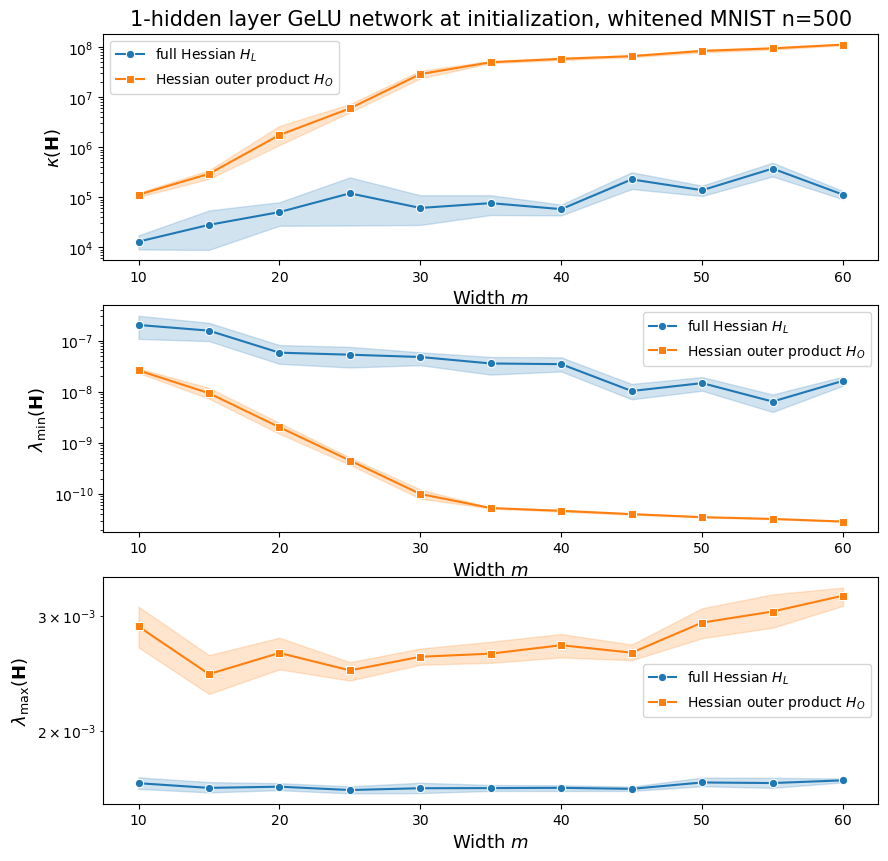

In [497]:
plt.figure(figsize=(10,10))

plt.subplot(311)

g=sns.lineplot(df_H_gelu, x='width', y='H_cond',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_gelu, x='width', y='H_o_cond',marker='s',label='Hessian outer product $H_O$')

g.set_ylabel(r'$\kappa(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

g.set(yscale='log')

plt.title('1-hidden layer GeLU network at initialization, whitened MNIST n=500', fontsize=15)

plt.subplot(312)

g=sns.lineplot(df_H_gelu, x='width', y='lam_abs_min_H',marker='o',label=r'full Hessian $H_L$')
sns.lineplot(df_H_gelu, x='width', y='lam_abs_min_H_o',marker='s',label=r'Hessian outer product $H_O$')

g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\min}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)

plt.subplot(313)

g=sns.lineplot(df_H_gelu, x='width', y='lam_abs_max_H',marker='o',label='full Hessian $H_L$')
sns.lineplot(df_H_gelu, x='width', y='lam_abs_max_H_o',marker='s',label='Hessian outer product $H_O$')
g.set(yscale='log')

g.set_ylabel(r'$\lambda_{\max}(\mathbf{H})$', fontsize=13)
g.set_xlabel(r'Width $m$', fontsize=13)


# plt.savefig('conditioning_evals_fullHess_vs_H_O_initialization_GeLU_L=1.jpg', bbox_inches='tight')


/tmp/ipykernel_3477577/206536426.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(widths), 2, 2*int(ind)+1)


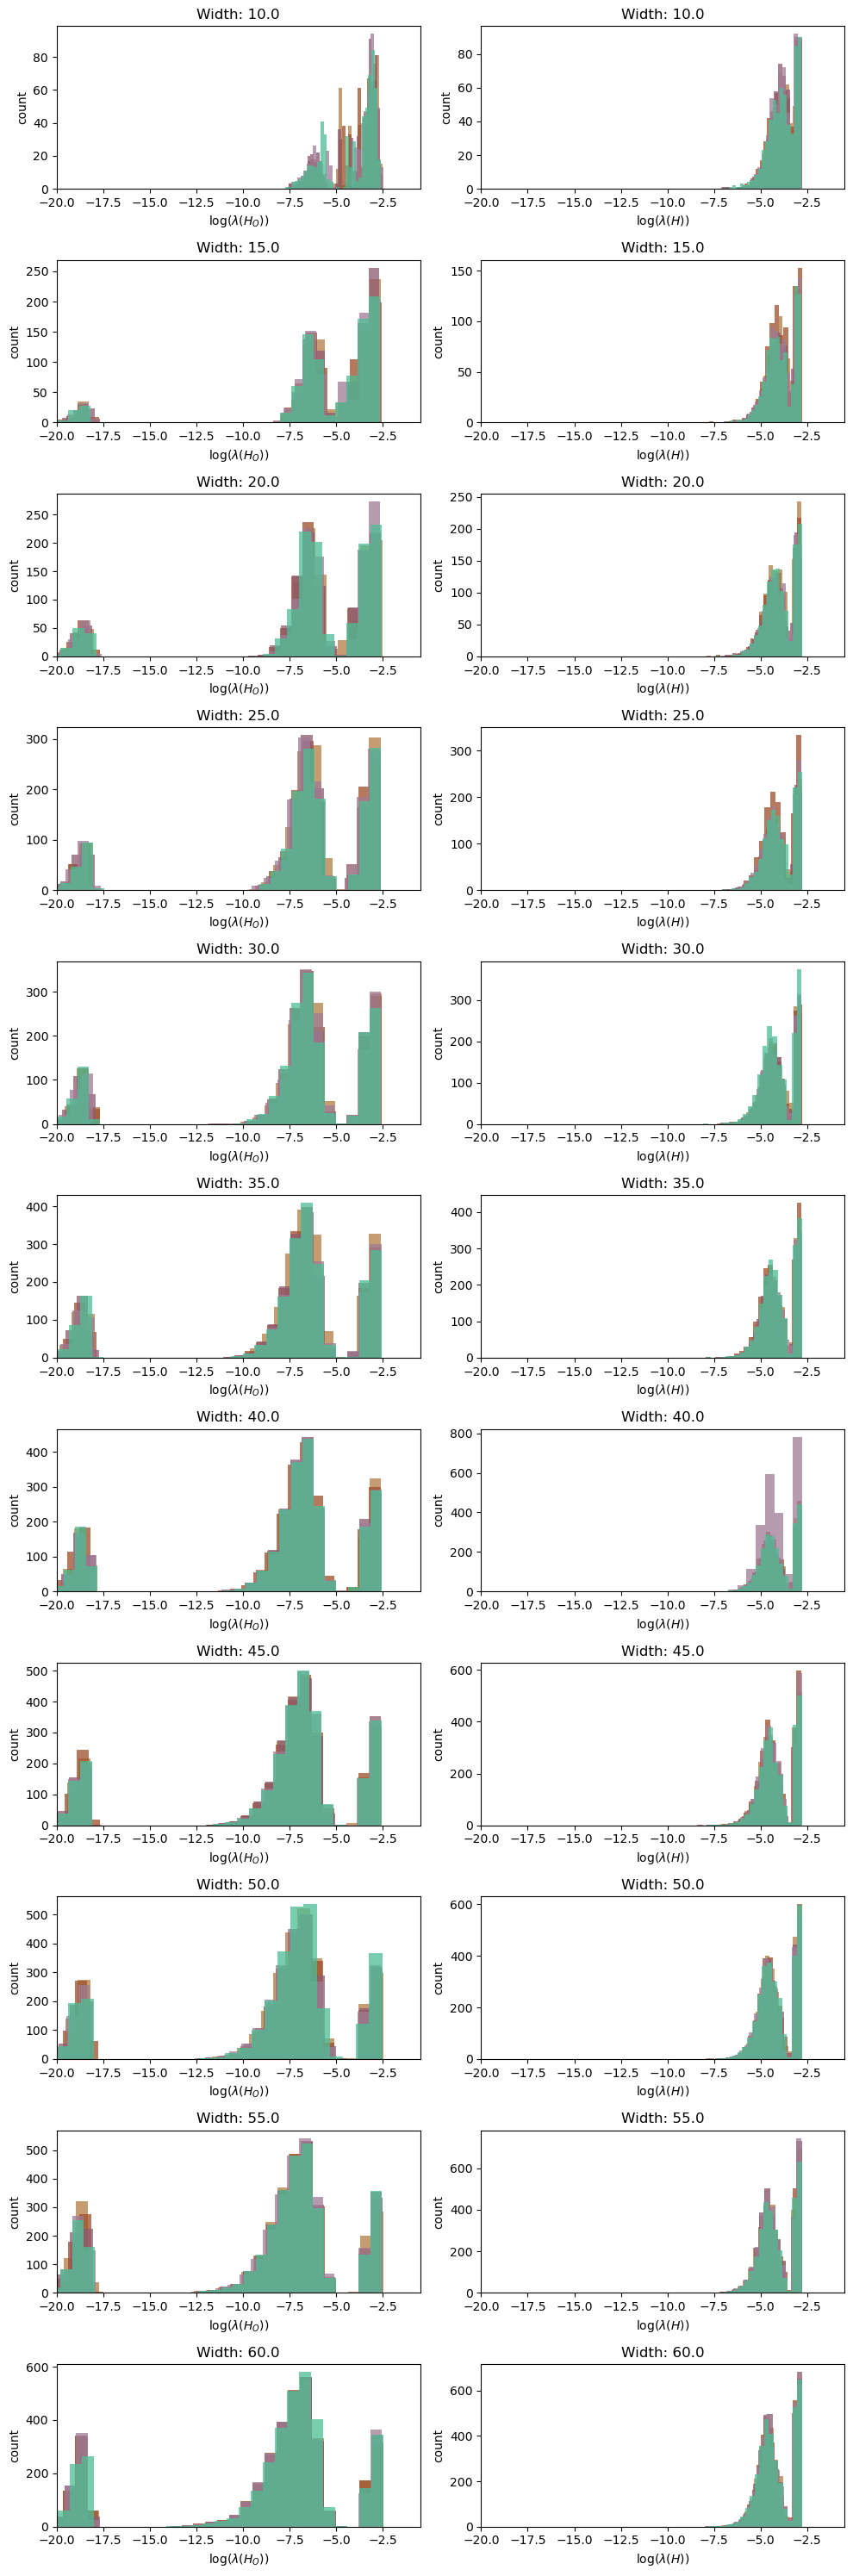

In [484]:
widths = df_H_gelu.width.unique()

f = plt.figure(figsize=(10,30))

plt.subplot(len(epochs),2,1)

for ind, width in enumerate(widths):
    
#     print(epoch)
    H_specs_width = df_H_gelu[df_H_gelu['width']==width].get(['epoch', 'H_spectrum', 'H_o_spectrum'])
    
    plt.subplot(len(widths), 2, 2*int(ind)+1)
    
    for i in range(len(H_specs_width)):
        plt.hist(np.log10(H_specs_width.iloc[i]['H_o_spectrum']),alpha=0.5, bins=30, label=f'{i}')
        
#         print('H_O: ', H_specs_epoch.iloc[i]['H_o_spectrum'][-1]/H_specs_epoch.iloc[i]['H_o_spectrum'][-490])
        
    plt.xlim([-20,-0.5])
    plt.title(f'Width: {width}')
    plt.xlabel(r'$\log(\lambda(H_O))$')
    plt.ylabel('count')
#     plt.legend()
    
#         plt.semilogy(H_specs_epoch.iloc[i]['H_o_spectrum'],alpha=0.5)
    
    
    plt.subplot(len(widths), 2, 2*int(ind)+2)
    
    for i in range(len(H_specs_width)):
        plt.hist(np.log10(H_specs_width.iloc[i]['H_spectrum']),alpha=0.5, bins=20)
        
#         print('H_L: ', H_specs_epoch.iloc[i]['H_spectrum'][-1]/H_specs_epoch.iloc[i]['H_spectrum'][0])
        
#         plt.semilogy(H_specs_epoch.iloc[i]['H_spectrum'],alpha=0.5)
#         plt.xscale('log')
    plt.xlim([-20,-0.5])
    plt.title(f'Width: {width}')
    plt.xlabel(r'$\log(\lambda(H))$')
    plt.ylabel('count')
    
f.tight_layout()